# Algae Cover by Region
Algae cover as fraction of benthos in each GCRMN region. Based on visualization from GCRMN 2021 report.  
[Sister set of visualizations for live hard coral cover](live-hard-coral-cover.ipynb).

_Author: Peter Kerins_  
_Created: 16 Apr 2021_  
_Environment: jupyterlab_  

## Style
- Vega chart
- Time series
- Line for value
- Multiple, overlapping area marks for confidence intervals
- Different mark groups for modeled vs observational epochs

## Data
Time series data from GCRMN 2021 report.  
Carto: [ocn_dash_02_gcrmn_lhcc_ac](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_dash_02_gcrmn_lhcc_ac)  
Table includes synthetic data points to assist in drawing lines & areas without gaps.  

# Preparation

In [1]:
import json
from vega import Vega
from IPython.display import display

In [2]:
def Vega(spec):
    bundle = {}
    bundle['application/vnd.vega.v5+json'] = spec
    display(bundle, raw=True)

In [3]:
widget_width = 400
widget_height = 300

# Specifications
The 'structure' of the time series data was not the same for all regions. A separate visualization was created for each region, but these generally fell into groupings within which the specifications were very similar.  

## Type: AB
Regions where the times series data follow a simple AB format (modeled, then observed). The only important difference between specifications was `region_name`.  

### [Australia](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxBlYsDw6gCjEw4IRG0xC0g2NurHURkBuSlqH5+3J8E02j5+gAyilkQBadjoWDIZRgLX07Y1O1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GBrbb7bIWeyuTyAdSJvtWIQwz5bnd8EQSOQbJoLeobHR4Oh1BUy9xUKR0IRGJR0nwAI5GAD8LYAvCaAKKe3vPAAqYAAVGAAGJsgDyHLA3HgMkBYdgiEBMXSgOoBtQS6MiHg8EB6HgYAA6gAJXts3tgCoN+BdgCk6QA7I90MgX6+wAYaQARMBt3UXdATxMAuy+H47m-O4-mTJdsWg2DIDlJQAF0JjJcNMBwdEFShKAVX0E9dSVNUjHqSAkRufQKM1CsiTGVMlV9EDw12c5JhaHEpBTQjEkIdRuFaSsmluYSbCCFj9i1W0qKaZAK1uTNkCwGCAE07jGQj5QFSV0BkWA2J1PD0LQiBMMRcsZgGMB8IWRVEmIqBDgQAI6hk7jWluHRiS8skaz6PQ5mwiNblI+QoBcZAjGUW5FOUvT9ilGRqBxMIIgCoYCjS4o5RYpyiPpBL3JmLpCMCjAvDReIwBiOgADZMLASqZEYDxIklEUosq1L0tuZJUk6CywCs0pDjUNEMUqv1GC2W52G4AgazIxIypxNybM8yqjHQdhYonYVVy69Qet2-bYunKw9sIU6RQKmbSTmhb9BmJxOgCjbSu2tbJmYcr9AABV8DxenS+cmQO7xEA6xwrD+yATI4-Qn1Q2EMKwjB1AAazshyICKxoeNuahhPTRGnGE0y5gE6KT2QE5aa4pUXOo3x5tgY94AqlnEkzXCoEi1q+agMnuHTdhxP0YDQLxdGuLhWEAoF6aWaKrESpIo9UBWP6Lgl9ROv0W1NDUbn9aVAyjJMtXReZ+3EmaHz2kYIxtl5x3NkOITfO4AAhbhuBmQyAAoAEJM1YVA6FBG01TtABKBXRaVrjzJZtPLIC7G8bt84NatkmSP+TAvP2KnVtOMLBcgE9AV1+Lkq4yAlgsVZTjptMM3DWZC9JQ4qO+-Qto8rokfmuKEqUnZm9FyBpdC4eoCab6oon2L4re7gbF8QEAE5RGYruBSadIh9+-RV9+9eYqnujCFEg+j7nvmJ6DKihRFW4AGJRH-gBx8vbRTdkYacuR4DMEXg0L+swGoAEYADMr8WaNCDu7LQnFgHUXNLRKAwApgzHUh+MwrwrB3CincNkCE7hYCjjHWWS48SUI0jPWhflkATj9BgPAod6F0ESuoeQmk7iJ0oWQ3wtDka8P4bA4RdB0hPlEZQgAHDEJ8LxnCuDbsgKR3Dwx8PDNHOgRgd57zUaOeBcR5HwKcKI6CgBkAjgtIwxeBjHpifhYqx8Q7h0FsfYmCFCviHw0a8GQLg3AeD0exGRRiY6mN3uoZ+ljrG+P8YnRxzj9GxLcTHDxe9D4pJ8X4uxGTAmUI5IzRAKxaGuOMXHWACd7Tti+JUwykN5zsFNv4KkRlvg4DuByFYsU7SiNGCne2WdFblwFNUhGndsEuA-tXWBv92DsEao1RBiCgFe3fmAiBUDP4BG-jgBqogpnnEuQsa5KCHaoOdjiCsSlLaJErjTBoqttYNz1ncxYywO73LfumVSWD7aQEHtXZeEK14gM3tPJKMzSTQOopfFesKN73ygAk8xMRdmOwXufKFaKF4YrvlvKA+SklqPxeCpZlEVknJxH-AB-9aXz3peAk8RzGXCjgXQZBSL9LoJ0HdBZwCoA0QZfgwhakHgmE-Jo8hlDqH4hkLQ-hjCwI0BYWwrAHCuExLqTHQRwinxaTEV8CR6hok8ONXQORvjFHKK+Go0JWjIm6KwC4-hOLqUxCKTY0pmSfg+riXQKlgIvGpJKQEpRlCQmaPCdo9wXqw25JMWYpJhTvFBoCU40N2T7WRpzTG9JyEgmDKqTUrA9qGlNLAC0qt7TGSdO6eGXQsB+mtOGTMZQYyJmpxPtCIViQ5m+DBRy0Bxy+VrI2VsnZfyBScsOc0Gdpz6p0FfNcjGQ7M4zP7t5HEwYZA7Q5dTKiXyhY61+UK1uAK+7DspT3LM4qCWQqXiS0e5Vb6TwpQvGe7K34ouhdfMev74X6FWUui4kpuA4z7oKJlv9WVspg1bEVmC317KlbcAhAM5UkKVZIlVNC6Hhq1cwr4rCKzsMYKCQ1dr+GmpEZau41rbUGNkUy+Rzq2NuqTREnRnGcnGL9VGgNua0nBruAW9N7jH64sDdJuNlbE1hKE6mkT9rxOluKeW2TWSjX8JLaIZTsaynxtadW-ttb+H1v+M06zLamTcC6b4Hpnbu2DN7aMxO4yn3QifehpIbwdhQrgwh9dzL1mbO2WMHd8I6ZTIzjcwqlVHmk3JndAK7zJ2sQZkzQ9yotaSo5ubYWJ8a4RR5r1ee4tJaL0gJRmgg6bm6RVjhfOexits3rm56SVXpBqmNmVs2XNIpVetsZbh3X1aBaPbcJZHs6t7KOL7fQFRA7ByUjIOtSlGmOeTsFk+qWrmEXGgKXO+M6bFcyyXF5d68vVyvXXI8A2gP7DbsM-LpIQW91+y3D9DRoXfs8nCrFAHEULYXhfMeV8yV-tuLpl+o6lRnzh4DdFN8If-tM59lu9Lou-3gKIeB7AVGYHQ280BXLIFrt5Ruhq6RqeTEw2KoFBLcP6Hw9MQjCrSFhcraq3QGqKM7iYTq6jeqDVFuYzPM1FrxFC+9XL8NjqFFKP4+owTKaomq+M+G8T0b9Mybk2rjNkaTd5ss2p0Q7rk2eu076rNySpMWZDfJvJins1mfdwZqzVaWA1v2-HRzjbnMyA6QNjzHbZBdrAAMoZqg+0DoW4lkdT7QvzM52-InjOYvzvi6z-ZdOeWhVWWcugFyTt7umbdqbxchal1edFC9L2uvfI+0u+97dH0Ev+6+3PqDgeovh65RHkGV6AZLyBklYGf24+R67mls+iWfvH6SnHmK8c+4kwT0k+eK-If0D-Un5PKcH+XbT1dKLK+bsFTDiowdRWA9QdzmVBHiEC+Iza0jaqxcM0WtqBdVaN9V6NOELdjEWNzUXV2MVcvcHUeMnUtdVEdcNM9c00oD4kV9JMy0zcjMmNw0rc8DTdVME17ddcncDciCM0UdzMDNzdDdLc989MbcK0KkbNal7MDsG0m02ko9W0Y8-A48+lE8e0U8-MAtgEM94Q0ds8J1sMp1llj9Z1T9YsF0r8K4b9uUGdVCmct1ZDEtbkD1G8XZsUvAz08929QpXt+sukr9e8fslCW5B9+89lR9QdJ9IdBEtD0dMccQF9wcd9bhoM0d1pItEN79IAz8ycKcqdwi2cX8sNh834P9IBeciF5UngON-9RdyMgCJdtUQDpcwDZdmDoCFdWNldyEaCuN1dkDNc4CBMMDqDEDjdSD2DDNC0KjvdPFOiVNbcKCHdNN9d2jXc2DBjPdsCI1WC-d8DyDrNg9bNQ9DtXR+Ddto93MRDekE8k9fN+1-M2tM5gt5Dx1wsl5Ijid1Ci9F1jDksLtRpzJRggA)

### [Brazil](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxACF1OhqowjJBwQiNpiFpBsbdWOojIDchLUPz9uT4JptHz9ABlFLIgC07HQsGQyjAWvp2xqdrAAFU2QAZMBObjWQisIxGQpgZToPDoMDW2322Qs9lcnkA6kTfasQhhny3O74Igkcg2TQW9Q2OjwdDqCpl7ioUjoQiMSjpPgARyMAH4WwBeE0AUU9veeABUwAAqMAAMTZAHkOWBuPAZICw7BEICYulAdQDagl0ZEPB4ID0PAwAB1AASvbZvbAFQb8C7AFJ0gB2R7oZAv19gAw0gAiYDbuou6AniYBdl8Px3N+dx-MmS7YtBsGyrCSgALoTGS4aYDg6IKlCUAqvoJ66kqaoyqckBIjc+gUZqFZEmMqZKr6IHhrs5yTC0OJSCmhGJIQ6jcK0lZNLcwk2EELH7Fqtr1JATTIBWtyZsgWAwQAmncYyEfKAp4BKMiwGxOp4ehcoYVhCABGoaIYoRyr0rchw2TMZGJM0rS3DoxIySoNZ9HoczYRGtykfIUAuMgRjKLcSkqfp+xGdQOJhBE-mQEMBQyEUOAxHKLGKokxFQE0bl1JFjnKIFXhovEYAxHQABsmFgI5MiMB4kSGSKVWkilOLJKknSWRAmEhOghx2XhDmkn6jBbLc7DcAQNYeVAFUuVtmVGOg7AxROwqrj16h9Y5e0HUY05WHthCnSKhVzQKC1LfoMxOJ0mVbfo5Xlu5mVTO5+gAAq+B4vSpfOTIHd4iBdY4VgbZApkcfoT6oQscITYkGDqAA1gMYD4QsxXcd5+jUMJ6bI04wlmXMAlRSeyAnIzXFKqV1G+ItsDHvAXRM4kma4VAEXtRziRU9w6bsOJlM7kueKY+ccKwplIv2RzZNYs5JFHqgKwbRcMvqN1+i2poaj88bSqGegxmmVrksQDrXGNDxtwuEY2yCy7+xHEJPncKK3DcDMDsABQAISZqwqB0KCNpqnaACUKuS2rXEWRzWfjZleOE875xu55nskf8mD+fsdPrVRmv64ChtxUl7tLBYqynEL5EZuGsylwKhwKT9UCuf9lVRYtsXxcpOyty7inD+P8U7ZPMVxe93A2L4gIAJyiMx3f7E06RL7ZK-L5FKNTxvUDpqJe8H-PkvX0GClCiKtwAMSiL-f+H-7Vi0prq5HgMweWIUP6zCagARgAMzPw5o0MOPstCcUAYkGilEoDACBupB4JhPwvDeOoO4kU7hsgQncLAccE7AVAnichmlZ7UN8sgCcfoMB4EjrQugCV1DyC0ncVO5DXhWGoajbhvCoGCLoOkJ8wjyEAA4YhPmITIFwbgPASM4eGHh4Z450CMFvHeKjRwwLiLImBThhHQUAMgEcFJH6LwIY++piYjmMsXcOg1jbEwTIV8feajXgaNcO3ZAOj2JSIMQnYx291CP08fEbxvjU72Mcbo6JLiE5uISfvJJVibFpP8eQjkrNEArGoc4wxSdYAp3tO2L4ZSHbQ3nOwS2-gqTGW+DgO4HIVgxTtMI0YGcXZ5y4oggUFSkZdwwZPN+VEoHf3YOwZqzU4FwIARg1+ICTzgPfgET++U6CiHGarbuZz4TV3Zi-LyOIKzKVtokWuDMGgNzFgbI2kzFjLE7jche6Y1LoP9pAIeVER6gtXtfdeM9ErXNJBAhoEK-rnyvtFaem94mAhUVswBilT7guXr9KF6Lb6QFydimIuKQXe2wQ0JZ+gf5-1-tShetLpygP2Ysw50C6AIPhQZFBOh7qzLmZtc0tEcF4I0h+MwYjfABIoVQmhMSGCKzAjQJhLCsBsI4VE6pCd+GCKfNpERXx5WkKwE46RPLZHyMUV8FRwTnBhPcBEq1mSDVGJMQksxFjkk+KKekn41rVUUr9V4wNfiFHkKCeozR4TIlcK9XEne+T-WFL8Q4kNnreEUvTZG1JyFFVlJYJUrAXran1LAI0vpykZCtO4O03wnTdCwB6U0gZMxlDDNGZnI+VyB1JBIcCtlwCDnChxF-FZayNmspfuyzlzQJ1HManQV8ly0JjKZpMgeHsKZQGDDISq3cUb0wUu8yAJ4m5fIFZAduAzR3u0BX3J9SCwUhQhWPVFa8MVlVnvOpBiLqJErKiSm+twlnfIFLAQy3B8b90FDy7+zKWXQf2BUcOwq30vywbcXBzAZgysIXKkhirKH4hkNQ3h9Claaq+MwisrDGCgj1cm3hRqhFmruBapNeibWTrtQo7jTr42uu0R6-VvDU2+o8RmlJQa7jZtDdkug4a5OFsUzGwJohnWhK0e6lThiZOJPk1G4pync1hsIA-AtAai0lKaeU8tlblJ1P+A0pzLTGRtI6eGNtHa+ldqGanEZA7oQDvQ7gEd4K4MIZXVOmd6zNmjE3fCHdhEc5YyKo5O5txpY00yi8nDKMWZsz3VzS2vMbb9Rfpe8Wp6CuEDlvl9VysMuqw1jhYuewKt6w+YCJt0lT3SDVObTaPNrYRVPfbR2nCeva3C+THE3tfa1bxYHHY+gKih3DvW1zycPPp0i93LL5zzg4wFIXImJMS4zfLmLSuTyornvrt1xuQ3ANKgfX8geiQX1ZlFXij9SLQOQsvr+sl-CvsIrPsDMDEPoV-sgCZ-eMOBQnzhziFFANIeqhs2mp+Aqa7ju5ZO7+8BRAwPYEozAUXnnAI5Xs5dZPV1NXSPTyYQq0FA+2Xh-QBHpj4NlcQ8R5CKO6Go6q2jGrqBaqYzqlj7CrOqc4yah1PGyOSfY6qmR3j7UidUWJgzfGsnGZ9ZSgpCms0ZKk9Zh+Eb7NacVXGkJCa3Wm5TRbuzmaLO2516p-NogrfmeLaU5zPaK28KrR5mtXmG0+aGy2-zsh21gF6f01Q3be1LbS9CYn0WZn-JpaTyByHGVJbnZznZTOwEs7L+T45pyTvbtztcvdeWK6PLvcVt7YUPvtPR-e35-ch0A9H3M0FWPtqI9JbCueBfEjAeReBmFmL3Ho+PgSz9YOccTyR2S9Tm+gELIb6uyAX9KfU9p8fhnQZa9crP7y-lS3kFYZ58XvF-OpWEeFyR0XCq4uyqNGbW9GdwjGlquqKuhiaupqoiWuRmCceuciwmyiRubu4mhm0BsSFujuvuwaiBamBOsmIeDm2mdwruLqJu2u-GqqqOweZmDmlmdugexBpmmm0aJaEeVS0ebm1atazSCeTISefgKe3S6enaWeIWYWcyeeg6eK0yvgOGpItKCWyyqyyWt+8yuydewGDKa6G6Le-abeTMHeD2KOXgJ6bKr2IU9WR4n20Gw+HcE+IK4+yhg80++g36uOB+8+Whi8hK58xKs+EG+gUGi+m0cWiG+hF+V+NOdOERb+qCIqn+IK3+kAguRGBCTwvGQBlGUuqmMujCDG2qUBLBMBs8xqcB5qCB2BdAyBBuaBem7uEmhBJmeB1ufuOa5ROSbBHRoejmFBumxuiaNBZuOBWKPunRBBdRQepBzu4eZakeB27mroAh9ajazaohXSaeGewWPaoWfauckWBew6ReSKURahFeGhVeaWly4yZ26W40IAowQAA)

### [South Asia](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAGVuOUHAYqphwQiNpiFpBsbdWOojIDcuoifz9uT4JptHz9KKUsiALTsdCwZDKMBa+nbGq2sAAVTZABkwE5uNZCKwjEZCmBlOg8OgwFabXbZCz2VyeQDqRN9qxCKGfLc7vgiCRyDZNOb1DY6PB0OoKqXuKhSOhCIxKOk+ABHIwAfmbAF5RQBRD0954AFTAACowAAxNkAeQ5YG48BkgNDsEQgJi6UB1ANqEXRkQ8HggPQ8DAAHUABI9tk9sAVevwTsAUnSAHZHuhkM+X2ADDSACJgFu6g7oCeJgJ2Xw-HcX53H8SaLtiUEwZAcpKAAuhMZJhpgODogqUJQCq+jHrqSpqkY9SQEiNz6ORmrljq8oCj6wFhrs5yTC0OJSMmBGJIQ6jcK0FZNLcgk2EEKYClqNqUU0yDlrcGbIFg0EAJp3GMBFMfseDajIsAsagaJoahEAYYiZYzAMYB4QsiqJERUCHAgAR1FJiTNK0tw6MSHkqNWfR6HMWHhrcJHyFALjIEYyi3PJik6Uq+nUDiYQRP5kBDAUMhFDgMRylJDmEfS8WuTMXQEWSgVeGi8RgDEdAAGwYWAVUyIwHiRHpIqRVVKU4skqSdGZYAWaUhxqGiGJVb6jBbLc7DcAQ1akYk5U4i5VnuVVRjoOwMXjsKK7deovW7ftMVTlYe2EKdIqFTNpJzQt+gzE4nSZRtZXbWtkzMBV+gAAq+B4vSpXOTIHd4iCdY4Vh-ZARlsfoj4obC6GYRg6gANY2XZEDFY0XG3NQglpojTiCcZpx8VFx7ICccx045pX6DamhqEe8CVRxSoZjhUARW1fOJGTEqEOwon6EBIF4ujHFwrCmUC9NfPFVibNC4eqArH9FwSuoXXs7482wNz+tKnp6AGUZaui4TLMCl5OIuEY2y8w7SpHAJPncAAQtw3AzDbAAUACEGasKgdCgtaaq2gAlArDtKxxpl82n5mZdjeP2+cGtWyTxH-Jg-n7FTq2nKFguQMegK63FSWkksFirLTXtQGmynsZ3kCHJR336FtbldEj82xfFCk7M3ouQNLIVD1ATTfZF48xXFb3cDYviAgAnKIYzlxx8-pIPv36Cvv1r9Fk+0YQwn74fs98+PgaUUKIq3AAxKIf--0fJ2FdGCBinLkeAzAF4NE-rMRqABGAAzC-E+FRg46Duh3TuSpqIUX0MAKYMxVLvjMK8KwdxIp3DZPBO4WAo4x1louPEFC1LTxob5ZA45fQYDwKHOhdAErqHkOpO4icKGkN8DQ5GPC+EwKEXQdIj4REUIABwxEfC8ZwrhW7IEkVwsMvCwzRzoEYbeu9VEjjgXEORcCnAiKgoAZAJYJSIMXgIxaZH7mMsfEO4dAbF2OguQr4B91GvBkC4NwHhdGsWkYYmOJid7qCfhYqxPi-GJwcU4vRMTXEx3cbvA+yTvG+NsekgJFCOSM0QCsGhLijFx1gAnO0bYvgVJtpDOc7AOb+CpAZb4OA7gchWDFW0IjRgpy9lnRWx99hVIRpgvubtcEhRgT-dg7AmpNQQQgwBWCoogKMGA48kCP4BC-vlOgohJnnCuQsG5yDC6eWLkLUultEiVxpiFVWxEdZ62QYsZY7dmZ927mGWYDyBQD2rkvfuq89kbynolaZAooFUQvsvWF6875QHiWYmIOysGn3PqPS+GLb6by7g-XF+KFn7JOcKHEv9-5-2pV7N+BzwHHOris85SCkW6SDu7LQvcCU4NuPggGKkHgmA-BoshFCqH4hkDQvhDDQI0GYawrA7DOHRNqTHARQjHwaVEV8cR6goncL1XQWRPiFFKK+KokJmiIk6KwM4vhOLEmeJScU-xjifjutiXQPJXqYiFOsSUpCgS7jBI0WErR7hXWBpycY0xiSCleIjX6zJuq+EhqSZm1JkayktMqdUrAVr6mNLAM0gZCkZDtO4J03w3TdCwD6S0oZMxlCjPGanIB8I+W4DeDseZrLFl0rOVAb+ayNlbJZQ7NlhyIHNEnbAugL4bkY37ZnY+4LibeTel4Hai73mUS+drBuvykWQFbkM4Vr8QWZjHYuyFi80UwuvnCrF89p4Lrnii6FV9R43wnuSwUpy6h-IFLAPS3AcZgog-Sn+TLmXQf5WgoVL7WWirwQQyVxDZUSPldQ2hQbVVMK+Cw8sbDGCgh1ZavhBrhEmruGai1+iZGQbkXa1jjq43hO0Rx7JRjPWAm9UUtJGSA1ZKtfmiTWbSmKIobG0JgnE3CatWJjNPqpN3H9cmtxlL02iHDUW-xynS0sHLZWhSDT-hNNLW0xkHSulhjbR2gZXaRmJzGQO6EA70PDrmYvODCG12rPWZs7Zowt3wjppMjOtyipVRdqTcmd1Mpnuw28hmTN91OSoqbLmwsnY13CjzPqi7xZpilqTbcjCaB9tudpFW2F857AK1rOuh4m2STK9INUxsoAczNhbG91tbZcI6+rfznFD17Pdr4T2fcfajsmAHAV9bbPxwc8nQLTskvXIIuNAUud8Z033WlkuClXlRWpue9r3zAR9f-fsO9gLwWJCfWCub-ciWA2cqSsDCKZ5DsSIBj9wGKqgfhVvBJT83snyaGfKFUPgdw4pY-A+SPSQTq5ZBn+8BRBwPYMozAQW3n7OXZy5ZhPznpEpxtzDGCgW7JG2aGiUBxXTAI9KkhI7o0Kt0Mq8jDW1XUA1TRrVdGOGyaY9PQ1xqxGC7dfLoNNr5GKL42ogTCbIlq9zUGsTCnzOlIM+rlN8mw2Ft9Up6NqnnVCcN4x43aaC26eLRbo3VvjMe8k8WyzdbrM9orXwqtDma1OYbS5vrLb3OyHbWAfpgzVDdt7XNuL0Ih1JBHQ+ue+O6fIf0DOqL86mdLo5augnxeGoXKz-FndUzLtleu8827N7sufKe5e170Hb0At+8C9MoL8+vzfQ0aFI8YffvAwI3HyKAc4mh+5WftwTd4oryjpfP0QNr-vh4zf4PFtLOgfT6dxPSfk4X8A0BVeUXcrr7yv7qDBWs6+zBznSzIA88IVKp47GJGiqouKaFG6qVGmq2qluRizGRq9qbGquhmMcmuvGKiuuam+uSa0BcS7upudu0mSBwafueBemQeju8aLqmmHq7uOmAe2aMmPuRm2OpmtupB0aFSIeNS4edm1atarSMeTIcefgCevSyenaaePmfmuyDeQWueIWH+VO78NeU6kApec6MWx+leRy1eReU6jUm6B2Te1ye6reTykAQYMgJ6BeD21cF6PWL2nSC+A+bcQ+rKP2Y+J8E+qKxKQOX6mKc+f6W+O+JKfhZKtwKyFesGgk4WyhDKl+ZOFOmhr+6CHhr8uG3O+GRC-ORG5qQBIuZGoB4ulGdw1G5qMu9G2B-CiuLGKuZCLunGGu3Gtq2uaBTqFBzuhBG+Zm+B+mOaruvuh+3RbBKmogbR6mBunRNBLBnu9BhB+atBimUa5SZaoeO29mLofB9ajazawhPSSeKe3mPavmzWmcgWOesyy2UKYWiGj+qhs60WYwcWdyJ2o0pkowQAA)

### [Caribbean](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxz3QmnY7GQ6Dk4IRG0xC0g2NurHURkBuXURP5+3J8E02j5+gAyilkQBadjoWDIZRgLX07Y1O1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GBrbb7bIWeyuTyAdSJvtWIQwz5bnd8EQSOQbJoLeobHR4OKKmXuKhSOhCIxKOk+ABHIwAfmbAF4TQBRT0954AFTAACowAAxNkAeQ5YG48BkgLDsEQgJi6UB1ANqEXRkQ8HggPQ8DAAHUABI9tk9sAVevwTsAUnSAHZHuhkM+X2ADDSACJgFu6g7oCeJgJ2Xw-HcX53H8yaLtiUEwZAcpKAAuhMZLhpgODogqUJQCq+jHrqSpqkY9SQEiNz6ORmrijq8oCr6wHhrs5yTC0OJSCmBGJIQ6jcK06jNLcgk2EEqYClqtqUU00o7PombIFg0EAJp3GMBFMfseDajIsAsagaJoahEAYYi5YzAMYB4QsiqJERUCHAgAR1FJiTNK0tw6MSHkqNWfR6HMWERrcJHyFALjIEYyi3PJ4pjP5uIytQOJhBEyVDAUMhFDgMRylJDmEfS8WuTMXQEWSgVeGi8RgDEdAAGwYWAVUyIwHiRHpIqRVV+lpbcySpJ0ZlgBZpSHGoaIYlVfqMFstzsNwBDVqRiTlTiLlWe5VVGOgUpGOOwort16i9XtB0xVOVj7YQZ0ioVs2kvNi36DMTidMlm1lTt62TMwFX6AACr4Hi9Glc5MlK3iIJ1jhWP9kBGWx+iPihsLoZhGDqAA1jZdkQMVjRcbc1CCemSNOIJxmnHxUXHsgJxzPTjmlfotqaGoR7wJVHFKpmOFQBFbX84k5PcOm7BNGT26LniGMcXCsLJYLM388VWLs8Lh6oCs-0XJL6hdRzvgLbAPMG0qekyoZfq07ZrP2U7umk+0jBGNsfNi-sRwCT53AAELcNwMwygAFAAhJmrCoHQoI2mqdoAJSKz7yscaZ-MZ+ZyU4-j6scZr1tu8L-yYP5+zU2tpyhULkDHoCetxTpHGQEsFirHTPuJOmynsT3zmUT9+jbW5XTIwtsXxQpSUu0qMu1yPUBND9kWTzFcXvdwNi+ICACcohz4PiRNOkw9-foq9-ev0XT7RhDCQfR+tz7k9BpRQoircADEoj-wA4+J935GCnLkeAzBF4hS-rMRqABGAAzK-MWjQQ6ey0APYB1EKL6GAFMGYql3xmFeFYO4kU7hsngncLAMc45ARAnichakFLUN8sgcc9twzh1oXQBK6h5DqTuMnchJDfDUJRngbh4ZY50BgQIug6RHxCPIQADhiI+F4zhXAd2QOIzhkieFGB3nvNRI44FxHkXApwQioKAGQCWCEipF4BkemJ+pjzHxDuHQKxNjoJkK+IfDRrwZAuDcB4PRrEDHSLjkY3e6hn5mIsV4nxyc7EOP0U4lxj896H0SZ47x1jUl+PIRyJmiAVjUMyXHBOsAk72jbF8UpMooZznYJzfwVIDLfBwHcDkKwYp2iEaMNOPcc5K0rgKcpiNu7AJcB-WuMDf6Siak1BBCCgGDxAWA48kDP4BG-vlOgogxnnBOQsM5yCiZOxJt5Yi5craJGrg7BoatiK631pcpUHd+mYP5pAPu4ZZjF1JIcC+49R5ryilPLeK9Z6fNJFAhoy9IDX3HrfaFtxYkmJiBsnuKLz5L0vivSFG975QFcdi3Fb85k4OgfsnEf8AH-ypSgml2yIGiQWfS4odAkETNJBUUOOh7ozJPlAbBtw8GAxUg8EwH5NGkPIZQ-EMhqE8PofLGgTCWFYDYRwyJVTeEKQEY+DSwiviiPUBEjAUTnFxzkV4xRyivhqKCVosJuisCOMMcY+J7ikkFN8fYn43rol0ApX6mIeTLGFKQv4u4gTNEhO0e4T1oa7V0CxfE3JHiY1BvSQanhEaEm5uSbG4pjSykVKwIampdSwANN6dKGQLTuBtN8B03QsBumNP6TMZQQyRnp3nvCpUUzfC-NZR7WlDRFn6B-ss1Z6zR1V2ney3ZXLhSwLoC+M5mNh3ZwmcCzityoDBhkLtalNNKKvJ1k3D5-LNjLC7izTZAKsyirxaCwl4LnIkrvjClFcLH37ERVRIlKL-0Yv0IsldSpYB6W4LjIFgpuXzqZcyuDnk0HCsnW-CVuD8EyqIQqsRSqqE0LDRq0CWqvjMPFKwxgoJ9U2sNXwk1ZqRFvCtV6jJPCHUKKUeau4rqk2hJ0darhPq4mAn9fklJaSQ18bDcWuTeailKPIYm4J4nU2SdtTIrNJaA0KbuMG9NWSn45pM+WzTlaWDVtrdKWp-x6mVuaYyVp7Twxdp7b0vtgzk7DPntCEdIHcDceHoh5Deyt1LPYCstZYw93wnpmMrO5yipVS8jiCWlNkpPLwwzDwzNj3Km1lRM23MRbXNvQ3XmfU355cINLWWwFNVFDS9pVW2FC7nDK05ergI22SWudINUJtxVVYthFa5NsDJGT62LY9rtT3vy9o14BftFKTCDmg5tTnE6udTiOp2GXTkEQmgKfOBN6ZlZy+Fe5j7kbXtrnVxuI2WW+2fUC+e-yMyAqKyCsFQM-03yhZvGeiUsMrxBziVFFV0WQ+3jJw+X225nzh79NFEOyX-asy-cLjzp2xYOVAH+8BRBwPYCozAMOtngI3XSuLhz0j08FegkVr6xXivNDRKAUrpjEblcQ7j8blW6DVVRuWNHqDaoY7qpj7DlMZvY4I4Tlr9OGoE064TomdMpvCbxwtYajNqbLfmpTJuM2qajaWwNGn43afdRJ43rHpM5NENGi3RTzMq8s5773Du40lKrQOmtPC62uYbe5ltnmRsdp87IbtYAel9NUP2wdIXUuDzg0kSLn7qUk83WTyAC6EtLvR6SNljPOXM7J41Y5p2D3jLu3N0uDcnvXMK293rbzhttKr0+zuv230A4-dzzZ36QrIrHoj3HgG+FD9A1jq+UHkdnt9bJnF9PMc-tB5B8HpLAO2+X0qGlpOGWU+p7Ts-xOgzrrr7OtDDVeXs5wxgwveKCMC6I4QkXpGVq5GKqUuGa1GjCdGOqeq-uccaupqzqdwmubuUmYaOuQmqi6iYmhuaaMBmaW+5uweZmBa7uKm2SkaQepmdmCaogbqyaHqWuHu2aXu9upmfu1uAeTBFBtm8apSDm4eh2LmrojaTSceTICefgSeXSqevaGegWwWYqKW0I4W+e0yk+eKF+JeDKi6SW9ONeOyT+qGLOr+u6zeYsFyR67ea256l6rKr2IU72h4n2o67cP2QOZE4+o+wC0+SKEGc+7kC+UOOwu+q+xKR+AGtwsGRO4q0WKGc65O1+NOdOURqCQqn+ahmyP+kAguBCsqTwmuwBkulGYBMuEBdw9GPG0B7BsBxq6uXGpCyBBm9q9K8iuuGBtBumRuFmMS+BduNmluXR4aZB2+XBviVBzudBruAxRm1m8m5abBJBNuQxMx6mIe9m5S-Bkezm9awhzara7aEhnSKeaeAWA6QWQ6ZhYWf246O2SKMRl+8WiWy6KWFyl2Y0pkowQAA)

### [Pacific](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAAV0PBGC54JBwQiNpiFpBsbdWOojIDcuoifz9uT4JptHz9ABlFLIgC07HQsGQyjAWvp2xqdrAAFU2QAZMBObjWQisIxGQpgZToPDoMDW2322Qs9lcnkA6kTfasQhhny3O74Igkcg2TQW9Q2OjwdDqCpl7ioUjoQiMSjpPgARyMAH4WwBeE0AUU9veeABUwAAqMAAMTZAHkOWBuPAZICw7BEICYulAdQDagl0ZEPB4ICJWAAOoACV7bN7YAqDfgXYApOkAOyPdDIZ8vsAGGkAETAbd1F3QE8TALsvh+O4vzuP5kyXbEoJg2VYSUABdCYyXDTAcHRBUoSgFV9AlXUlTVIx6kgJEbn0cjNQrHV5QFX1gPDXZzkmFocSkFMCMSQh1G4VpKyaW5BJsIJUwFLVbUoppkArW5M2QLBoIATTuMYCKY-Y8G1GRYBY1A0TQuV0MwhAAjUNEMQI5V6VuQ5LJmUjEmaVpbh0YkpMSZQaz6PQ5iwiNbhI+QoBcZAjGUW55MUnSlX06gcTCCIfKgIYChkIocBiOUpMVRIiKgJpnLqcK7L8jAvDReIwBiOgADYMLAOyZEYDxIj0kUKtJJKcWSVJOjMiAMJCdBDms3DbNJP1GC2W52G4Aga1cqAyscjb0sgIx0HYKKJ2FVcuvUHq7N2-ajGnKxdsIE6RXymaBTmhb9BmJxOm2jb9FK8sXO2qYXP0UVfA8XpkvnJl9u8RAOscKw1sgIy2P0R8UIWOExsSDB1AAawGMA8IWQrOI8-RqEE9NEacQTjNOPiIolZATjmBmioc-RbU0NRjxlXqON87DQr51qBcSCnuHTdhRPJnclzxdHzjhWFtszHDCYZkmsQ5qAJUBVAVjWi5JfUTrOd8ebYF5o2lT09ADKMmyxeJtmBXcnEXCMbYuld-YjgEzzuAAIW4bgZntgAKABCTNWFQOhQRtNU7QASkVsXlY40yBcz0btpx-GnY4rXba40L-kwdL9hp1bTmC9XID1g2YoS0klgsVZ6edxJ02U9ju6gQ5KO+wetoi+botihSdlbsXIBloKR-nsekYnmK3u4GxfEBABOUQxirjj5-SYe-pxX6rK6VeovXqB02E3f99ngXV6DSihRFW4AGJRF-v+D99kqT2V1ciSmaO-AIn9cp0AAIwAGZn5HwqGHHQd0u4DyVNRCi+hgCAxUg8EwH4XhvHUHccKdw2TwTuFgWO8cgIgTxOQtS09qFeWQBOP0GA8AR1oXQOK6h5DqTuCnchrwrDUORtw3hH9kCCLoOkR8wjyEAA4YiPmITIFwbgPASM4eGHh4Y450CMJvbeqjRwwLiHImBThhFQUAMgEsFJEGLwEY++ZiYgWKsXcWBtiU5ITIV8Pe6jXiaNcO3ZAujWJSMMfHExW91CPy8fEHxNi7F3EcT8ZxvD3GJL3sk6xfiAnkI5MzRAKxqEuKMYnWAyd7Tti+KU+2kN5zsC5v4KkBlvg4DuByFYUU7TCNGOnZ2ucOKIP2OUhG6CB6v2wUFGR392DsEao1OBcCAEYPHkGacoDmALwaIs6BogxlK1dqc+Eh8S5uTLsRCuNtEg1zpkFNWwt9aGwmZsZYndWazN7uGWY1yBRDzrkvJyZ8r6RUnj9aemyMHz1PpfH6K8oW3x2qYxJqi4WzKaCfUFELkUQvCtfaFd9CAPyxZ86ujA351yOVAH+f9f7Yu7nM3ZEp9kQOFLMBqCDD6kmQV7LQ-d4VYNuLg5gMxVLvjMGI3wgSKFUJobEhgctQI0CYSwrAbCOHRKqfHfhgjHwaREV8OVpCsDZJVTIuRCilFfFUSE5w4T3CRMtXomJri4kYsBOYyxKTfHpMyVar1dBcm+s8f6wp6TFHkOCRorRESolcP1cYn1+So2pKKRkpxHrU3hozd4wN-joIKtKSwCpWBU01LqWABpvSFIyBadwNpvgOm6FgN0xp-SZjKCGSMjOgCqW4BISK52cyuVQIZcs1Z6yWXjuAeysBBzBSQJ5XQF8FzUKjIZogoFjRblQGDDIcqrska00oq84iR5m7zoFO3fpY6j7-KzDM1lILF4EtHkS8eN8p7xX5QKFdS8L7-V-aS1d3K70v1gHpbguNAWQanZARlTLoNINDkKtBvytnrXNDRKAErpj4JlcQ8R5DKH4hkNQ3h9D5Yaq+MwisrDGCgl1Sm3hhqhGmruOa5N+jpFrttYonjjqE0up0e6vVvD4keIKVmoNubpMqvDX6otaSS2xqCaIJ1YTtFupDUY2TeTRDyeLQ4pTHGVPku3oWgNGnimNLKZW6tClan-HqU55pjJWntPDB2rtvSe2DJTsMwB0Ih2AcSFM3ww84MIcnTiL+M61kbNGFu+Eu6CLZwxgVOy7tbgSypttJ5T7HlMxZvu4qVELY8zCqLOeV7dYizPUVwg0tCtqoVllpWqshbTQFlVnWjcjwtskme6QaozbrVq1bMKZ67YO04UXZ2QLdKHtft7fmsz-Y7H0BUEOYdG2uaTh5tOQ7XY5bOecLGAoC4EyJucfdBW7kKQeRFC9dcmsjcBGN9DixvmAsAZAF9QOtmQA-Q0MFKK17-pnlFpUwGv3Lx-SStFxnH7-aA3iz9SKSow7-bRGzJmsfUtpQstd394CiBgewZRmBh2PJpSAjl4C6WU+gekRnkxMOoLK3PMVOC8HSsIbKkhCrKO6Boyquj6rqCauY9q1j7C82cenkak1ojxdSas6Gm1Pi7WibUeJ-T-HPVGZ9Wp+z2bg2q+sxSyN6ns1abuPG0JibXVm9TRjuz0aS22+U6GgtpnM3mdLSU5zfaq28JrR5utXmm0+bG22-zshO1gB6X01Qvb+3hcywPYdSRR1voXczxLSyVmpdJ0A5nS7OXs6g8cjLEWd05yuQtjbFY3uAfPbXF5-Xmu-baVjyAD6flrbJX3Evc9IdUWR+Cy+xLUVw+r4kJHeOUeL-A+jy3MRV8lRx1D5HoHyrb9VMTiN++J0N+Q1-antP6dX8XXstnFPG-1ToHyvPjRefCun+OwXQjYXAhJ4PjCjJVWjLrBjO4JjC1HVO3UNLjY1e1XjbXQzeOfXeRETFRY3d3CTAzBAi3BJCNMzBzHNLJQg+OVTR3a3GNBVN3Z1U3HXATFVH3EPJ3RTCgwPNxC-X3BTTTMtSPSpGPNzWtetJpRPJkZPPwVPLpDPbtbPELMLLZZvS5YHGLPbHDWZYBcvfQZLSvOdbnNlF-FdelBqTdC7VvcZdvcdF7I9LwU9BdT7fvEKa9IfIIT5UfQHfnNMDMAFHw4FRFIGb9LfNHFfIw9fYIzfMDMI-QRZIw2DQSBLG-JLe-OnBnBHNyX-bDCfC4fDeZSAIjKVEAohMAr4SXWQaXUNWXRhRjLVeA7gg1dXbjLXcRZg83DAoTA3bAh1XAxgpNdo73XfUgm3SzFgoPC-K3P3RzV3HTE3AY9AtNYgvgsPAPXXHgh+FYsgl3ctcpKPE7dzV0cQxtZtVtGQzpdPTPYLPtULAdHOSLdQ4vReeLRDelFDFLQwjLC5MZK7fPMAUyUYIAA)

### [WIO](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAHUAJIAeUg4IRG0xC0g2NurHURkBuXURP5+3J8E02j5+gAyilkQBadjoWDIZRgTX07Y1W1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GArTa7bIWeyuTyAdSJvtWIRQz5bnd8EQSOQbJpzeobHR4Oh1BVS9xUKR0IRGJR0nwAI5GAD8zYAvMaAKIenvPAAqYAAVGAAGJsyUcsDceAyQGh2CIQExdKA6j61ALoyIeDwQHoeBgUUACR7bJ7YAq9fgnYApOkAOyPdDIR9PsAGGkAETAm-UbdATxMBOy+H47g-O4-iTBdsQgqCZVhJQAF0JjJMNMBwdF5ShKBlX0I8dUVVUjHqSAkRufRSI1cttTlAUfUAsNdnOSYWhxKRkzwxJCHUbhWgrJpbn4mwghTAVNRtcimmQctbgzZAsEggBNO4xjwhj9jwLUZFgJjUDRFDZVQ9CEACNQ0QxPClXpW5DnMmZiMSZpWluHRiQkxJlGrPo9DmDDw1uIj5CgFxkCMZRblk+StMVXTqBxMIIi8qAhgKGQihwGJZQkhVEgIqAmkcupQpsnyMC8NF4jAGI6AANjQsAbJkRgPEiHSRTK0kEpxZJUk6EyIDQkJ0EOSzsOs0lfUYLZbnYbgCGrZyoBK+y1tSyAjHQdgIvHYVlw69Qups7bdqMSUrG2wgjpFXKpoFGa5v0GYnE6Ta1v0Yqyyczapic-QAAVfA8XpEtnJldu8RA2scKwVsgAyWP0e8kIWOERsSDB1AAawGMAcIWfL2Lc-RqH4tMEacfjDNOHiwqPZATjmemCrs-QbU0NRD3gLpWZUTDgt57q2MScnuDTdhhLJrcFzxNHzjhWFNozLCCfp4msXZqAj0BVAVhWi4JfUdqOd8WbYB5w3FR09A9IMqzRdwp2BVcnEXCMbY+Zd-Yjj49zuAAIW4bgZjtgAKABCDNWFQOhQWtVVbQASgVp2lbY4zRYz4bNuxvHHbYzWbY44L-kwVL9mp5bTkCtXIF1-Wori0klgsVY6Z9qA00U1iu8gQ5yM+qAHJ+0qwtmyLorknYW6dyBpYC4eF42ieIqil7uBsXxAQATlEMZK7Yhf0iHsfotXxHJ437vCEEveD7n0Wr8DcihRFW4AGJRB-3-D-5qujBAySlyPAZgi8Gjv1mHVAAjAAZifsfCoocdA3U7l3RUlEyL6GAP9JSDwTBvheG8dQdxQp3DZLBO4WAY5xwAkBPE5CVIz2oR5ZA45fQYDwOHWhdAYrqHkKpO4ydyGvCsNQpG3DeFQMEXQdI95hHkIABwxHvMQmQLg3AeAkZwsMPCwyxzoEYLeO8VEjhgXEWRMCnDCIgoAZAJoKSP0XgQxaZ75mIsfEO4dBrG2MgmQr4+81GvA0a4NuyAdHMSkQYuOxjt7qAfuYyx3jfHJ3sY43R0SXFxzcTvfeSSvE+JsWk-x5CORM0QCsahzjDEJ1gEnO0bYvjlLthDWc7BOb+CpHpb4OA7gchWBFW0wjRhpxdjnNiiD9iVPhug-uHtsEBSgV-dg7B6r1TgXA-+GCJ7ANAeAt+AQP7ZToKICZit+bnPhEfYuLlS6EXLtbRI1daYBVVkLPWBspmbGWB3Fm-ce5hlmLcgUg9a7L1HhZLoV917T1ikfUkECKLny+pfcKU9N7xMBCo7ZGCT5nyhai8+oUYUYtvu4mIuL5lAMWZAo5OJv6-x-lSn2L8Lr7OaIc4U0C6AIIRa7EOnstB9zxVg24uDmAzGUq+MwYjfABIoVQmhMSGCy2AjQJhLCsBsI4VEmpcd+GCPvGpERXw5WkKwE46R9LZHyMUV8FRwTnBhPcBEy1mT9VGJMQkjxySil+IcT8K1Krck+piAUqxxSEIKqCeozR4TIlcM9XEvJogI0pKjXcQNwbsl0FDYkzxka-EKLKRUqpWBPV1IaWAJp-S5IyDadwDpvgum6FgL05pgyZjKBGWM9OADrkDqSCQkVLs2VcuOVAT+qz1mbJZWOhZICjwHNrssk5T4rnIXGfTRBILGj3KgEGGQpV+aIxpuRd5hEDxN3nQKNugzR3H0BZmOZrKwVLxRSPNF184Wz35fsJFy9vpQpJeim+gp6W3ufrAHS3AcbAog9yr+TLmXfO0oK1Bj6x1ipwXg6VhDZUkIVZQ-EMhqG8PoXLDVXxmHllYYwUEuqk28MNUI01dxzWJr0da7ltqFHscdXGl12j3V6t4SmsN6b-UlOzR63h+bfWFNSdG8hsaQnxtdVxrJhiJMFr9cprNGSxMhrvqmqTBmS3NLLT2itvCq3-EaVZ1pjJ2mdLDG2jt-Su3DOTqMgd0IB1odwCO8FsH4MToZTOjZWzRibvhDuvCWd0Z5Rsm7W44tKabReVhhmHhmZ7sKhRc23MQrNTHZenWwsyvzwy4QKW6W1XywS4rFWgtJqiwK9rBuB4m3iVPdIVUptVrFctiFU9tt7acMLi7EF2kD0vy9iLfufsdj6AqMHUO9bK1yXqQ51OgX+ZJYuecTGAp8740JucPdaWHlySeWFc9tcKvdcBL1qDip71-Nm7fXur6x3voaBC79sKvoz3e4iglAMirA7JVtb1D9wcCiaKfcFn6V7ErXrD-N+9EeANfquyD+hP7wFEDA9gSjMBBeeTSpdYDOUE6Qyc9IVPJgYeFX91lOGoASumPgmVxDxHkJI7ocjKrKPquoJquj2qGPsLkyq1jxr7UcaI6J5jKqZHeLtQJ1RQmtFupzTp+Himi0yaM+r3NCnw2FozcWmNognWhP11p5N8P8k2+k+koN8vLemYSe7-TmbLN1pYOW7bicHM1qcw2lzvWW3udkO2sAfSBmqG7b2-z8Wu5BeHbM-5eKFkRZWWs6LuPFSLo5UitdtVTlxYC9u7ONzxvzfLHd-lZ6a5vLa5V17HTEeQE+8Codz6h87IHpDnEkLfqY-A-wsviRANo+A9P0l4HdM4pZ-i1HhLocY9XyqP32LKWb8LwzydkBiek-J5T-95eaeV6LycvlmfGhs7QfnsfXPIA86lQQp4nGhclUKNGtqM7haMLUdUfdDFFcTVRFVdDc45Nc5F+NlFdd1NhMDcoDYljdrdA8A1zduMTMKVzMg97dHcNMRMECvUsUA8lNM1ZNjNfd75aDTcVMrNQ8bNw9dsXRa0WkY8mQ48-AE8elk9O008fM-Mdk69B1+4ZlfActSRT8llCcp0os50T979l16dlDGca8N0DsG9Jkm8x0btD0vAT0F1Hsu8gor1e8ghvkB9flR9WUR8FDQUJ91o98wNf158ioPCiUQMZ9bhllN8YN+Jwsz8GUScycKdfDX8UF2cP9RUzQqJuc8M-8iEACvhhdZBRdc1xdGEaMtVIDGDoCZ4jVYCzV4CsC6AkDtdUDyCMCXdxMcCSD8DvdSiclD8TdbcSlg81NnVnc1dCDc1dMWDeivcqDsc00PcLMFVykODqk7Mdtq1eD61G1m0hDukk8U9vMe1fM+1s5Atb9c95DQtwiENq8L81CYs4srkJkjss8wBjJRggA)
The specification for this region is representative of the group.

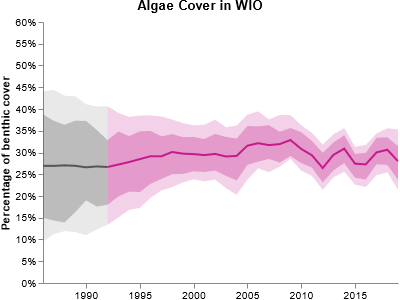

In [4]:
spec=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Algae cover with confidence intervals",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "encode": {
      "enter": {
        "text": {
          "signal": "'Algae Cover in ' +region_name"
        }
      }
    }
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "value": "WIO"
    },
    {
      "name": "url_param",
      "description": "Signal-based parameterized URL for pulling data based on GCRMN region",
      "update": "'https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27Algae%27 AND gcrmn_reg = '+'%27'+region_name+'%27'"
    }
  ],
  "data": [
    {
      "name": "ac",
      "url": {"signal": "url_param"},
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": []
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "ac", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_mod",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(!datum.measured)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_mod"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_mod"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_mod"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

## Type: ABAB
Regions where the times series data follow an ABAB format (modeled, observed, modeled, observed). The difference between specifications were `region_name` and the years of the epochs.  

### [ETP](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAFEACoABUg4IRG0xC0g2NurHURkBuXURP5+3J8E02j5+gAyilkQBadjoWDIZRgTX07Y1W1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GArTa7bIWeyuTyAdSJvtWIRQz5bnd8EQSOQbJpzeobHR4Oh1BVS9xUKR0IRGJR0nwAI5GAD8zYAvMbRR7Rc9xWAAFRgABibIA8hywNx4DJAaHYIhATF0oDqPrUPOjIh4PBAeh4GAAOoACVFbNFYAq9fgnYApOkAOyPdDIR9PsAGGkAETAG-ULdATxMBOy+H47g-O4-iTedsQgqCZVhJQAF0JjJMNMBwdF5ShKBlX0Q8dUVVUjHqSAkRufRSI1cttTlAUfUAsNdnOSYWhxKRkzwxJCHUbhWgrJpbn4mwghTAVNRtcimmQctbgzZAsEggBNO4xjwhj9jwLUZFgJjUDRHi5mMxJmlaW4DIDTAJNJa0VUIQTAQATlEQEPEYIMZCKWyBSOPiFLDVhUDoNMnNcgA+GI6AANjANswGiuKcAzYLQsc3wXNEJC2LhDYUNlVD0IQAI1CM3DSQIqBDhKmZiLMjjbh0YlfLJas+j0OYMPDW4iPkKAXGQIxlFuWT5K0xVdOoHEwgiVqhgKbzillCSFUSKrICaWq6n6vC2owLw0XiRLYrQsA9pkRgPEiHSRV20kppxZJUk6QqIDQkJ0EOMrsIxPbfUYLZbnYbgCGreqoG224arLOrWqMdB2CG0dhSXG71DuvaEaRowJysBHCHRkUVr+0kAaB-QZicTpWqh-Qtthna9qmOr9ElXwPF6aaZyZJHvEQK7HCsCHIAMlj9HvHLoSKkIMHUABrAYwBwhY1vYiz9Gofi0xFpx+MM05jNFw9kBOEy2MVDabU0NQD3gLpTJUTDevt+6LagLXuDTdhhM1zd5zxKWIU01qMyw5XjLVrF6RdwFUBWA8IYuL31Gu-RrcB2A7aTxUdPQPSDPK92ICjtjGka9pPO2B3i-2fydn0CoACFuG4GZ84ACgAQlSkLQWtVVbQASiDi2Jot0vSXMnEXCMau3drzZDgC+m5PUDve7oMb1CHgAeTsAEZnOcgAOUfcsdgqx7wj7STlxWi-OSf1Zxcs5JzxI9fB05uvDyBDzjgnTA48-LLFWIbRekA0yKVYpAw45E6bVShv1UWgNhqjTXmMXyFtNoIMZqNZBA00EjUptwGwmVXJYMdvsJo6Q8GlQIfglBg10HUQyuoLK7lkCeRGCAnBs8yI-yFCKW4ABiUQEjJFUMXp-TyuNcjwGYL7LqwjZjRQPgAZj4WXCobcdCEwgTIxIlFBFQGACzJSDwTBvheG8dQdx+p3DZLBO4WBN4ASAniRxKk16uOasgUcvoMB4A3kFEK295CqTuEPRxrwrCuLFiEzeqjIl0HSPeaJjiT4xHvLYmQLg3AeASUEsMoS8BpSMGQzK2ShwHziKkg+ThokQUAMgE0FEllLSmFapMRan1LuHQRpzTIIOK+K5XJrx8muCWEUrAHTN6VPIRw1yfT4gDKGUPVp7SSlJLCelcKohVkNKaZskZjiOSm0QCsVxnS+5yVgIPO0CU7gXPzjzGc7Brb+CpHpb4OAXkrCGraaJoxz7X0Xto-YVzhaGMgQI8iqixHsHYDFGKGiNHSJkagwME4FFKIRQEEROBoqiDyu7Ml5wKULG0c-cuGsoBvxso7UW+tyJh1jvHZQidIWbDAbMZ+iRoFhn5dQxU8Cf6IMgDDBhzDiEYPGtgsuyiGiSoZjKohQ0SFQEWT0zFkDaH0NZlANVcMNWsKgN0jh2S9W12xaYhoiL9DiMkRIm1xc7W4sPPioRhK1F0C0Yqqerc55aFgVikxtxzHMBmMpV8Zg4m+FGU4lxbi9keIDjQbxvisD+MCcxXZ5Twlr0ifeNSMSvgJvsXMnZty6ApIGekzJXxskTOcNM9wyBin5trTqq1vS6lrMGScrZPx5l7MtYCGpA7jnDIyY48ZeSCkzM7dW7tCyqnLMOdO9Zw67htNHTWzeE6VnbqHbOpNFyWDXKwLW-uDz-hPK+K8mQ7zuCfN8N83QsA-lPsBTMZQIKwUXwhYGxU0LfBhvdfCn1wocSiORai9Fbr3Yerxc0AlsHih0CfFSyljtcPwkVbS6etwvJMyg6yn+7LCL7k5dy0DkAZmAsg2XIVmZYW2vFV1SV0rTWoM1fKnYPKaGGpxCanaZqtWCl9chnBsAdLcHlvy6TmGnUutdcJ3Owb9EsfdRG-QUbpiWLjbY+JjjnH4hkK49x-tgKZq+D48sfjGCgjzcE2tESonlruJWrt7nkm+tSY27zLbF3ttmWOwtdBe2Tv7f0s9pz92Ra6ew2LRyd3nvnaIVtUzCkruSyFGLJ74sbJHQV-ZFCt0ld3XOp9lzr23vuY8+KdW3mMg+V8sMX6f0AtUP+wDorpYgdFUkOxCCFNKYw0SqA8GUVooxaMAjQ3gN7CvtS1azMK4e21oTVqX8DbmzLk4E2ZtaVW18JnbOC8y7UYZa7c67rPbe2UZAdNdmijGSpSA3+j89hnZjjRwEb6s5Mr0ynNOkMLu2z6syvOBcgm-YnoNl+lkq4Qeu+6+uTVuAtzbnJGQjWB4PpHqKzTArc5bexfPB7WKsf6CPqffe28PNrxJ8Nxe5OGr0qp+jmnkC6fGrXiz8se9OzpBiAfM+pPL6fZvq1e+SsVZP1h5TxlH8BqUa6rd-++5gf0eZUx8Bh33VsZFUYqVonoaEP4+azamDNOJGVRRfB9NrcsKk0V7KDvjV0IlS741bu5VsIOVwnhS1vd2qm3B+AogD7sBPsA0D+wBGesUehmD03orpAj7okNBjjfhrNFRMxFjY3WPjXYpNFndDWbTbZrxDns25sPXszzpam0+cr6u-zez61pIySFnJYW8t+dKeupZaXT2lb3dstd47UtTuq5lsZ2Xh-LtHwWipG6srpYS2VlvUXj1VcHdP2rLz6sAZvZvO9zXnnPtfe+vwXXZDfrAP8jkf7gVD1Bcjpb62RvgYNwF5QZyJR5IpzZIYR4p5oZO6OonSkrS7FwEY0oq7c5q4Mb7ZsrOyA566J4G58q6YCim6EGkhcYqr+5SqB4CarwKrI64J+4MKu5MKSakbb7WoR4GoMFGqbRUG24TrsFJ6KjQYqIyZOox5x4J6yZHZyKp7eoiGqYnQBp0G546YcaQL6Yl7RrGbl6maJrmYpo2aAQZrUBZpOY5ouYBIH5pRt5lqxJd7lZ97BZZJD6TJLodob49psFxYn67pJZWEhT8HeEzqnJn4LquHhb5b+HRbb7FY+HDJ+Fz6H6paxHBEIQXoX43LX5NYPotbn5tZMjA4frP6-Jv6-p9Zf4-5GJ-7QiCGjYwrAEobCEOqiEzYIbzZSGkjQFerp7yGZ7YbVHwj4afZEaoE4hkbq4srfxa7YF3ZA6fL66Y4EFqGsbpjCokEChkHO6MFILME25SbbwdEChO6qq8FSaIoR7yb8STYZ7R6x7x54Hm4qGhrLF6ZF6mKQCGYxpWJPC+b6GWa15RZvYN53COZVrN6JHWHFpeZ2HxLd5j696BYNoD7OE5ZuERZRExaL5xGJaz495JFORYmpFnIr6okREeHj6Va77T4JF4kpYHJUk1bpFXqX6E73ouh3744P6dY-Kv7v6f4Abf5AZ4bs62qAHjZXHKZwGQCzaIYLZ-7IE3wkwVQCgkaaw7a6ya6lzGweCnbMrnY2wg73bMra59R85lxPaEA+y3BAk0BAZfahwzFK5-Z6kA6zF0bsATHSCqgQ4URQ6GkTFw76QI6-Qc7KGU6zzU50EC6NA47Br47dxZFE7DxCn-6hmPHhlo47AY4obRni6S5M5C6bzbxs61xk5hnc4Rm85RnLxAF27ljC47z7x5nOQpnLYWxrbCmrby7lgPwhlsTEaq7-Cg6NGak-aA7umHGMZLENGkjEEvFlybE8anGCaHEiZcFibLmkIT6UIcG+7cYUHiZdB7EOQh4eReRFBQGgE3FiLqZe6CGyI4owFgHEqDJKGPHabPEzkoYaEfGl7fE2K-FfDV6yAAlpQ2kmGN5mHgm0lFrlglq2EVr2FRGOHInNouFtoj5wmb6FZeEMnxG4nwn4k9J4UhFJphEYXr5YWeHbnH5Ek0mEV0mUlT6MnnIZFX57I345Ecn5EdZFE8k9Yf7lECmVEyIDGaZ1EQbzmdFXm9FwZtGQH3lEKPndGwEtEkpiVDFjwjHuqqkMpDkTGYFUYzE66AJcoek8pTkWBG7k5QKrHsZfmkGW76C8YSbHk0FCaKX0H7nbE8G7Hu6sET4CF0GcHeXcGHmyrUEWoL4xCrlCEyXNEKHSm3mxUPnyIqXPmKE54fn56c6Kg-mfHaE-GV5-E16pqAn172YglN4WFuYMWwXqDwUd6+ZUUBawZBaoV3ChbhGYXlaYlBEZY4kHoQkBHRUkVpFZakk9UYkxG0UDX77DUVabpjXEnn7MmZEcXZHsmtYvrtaFFP78WlG9ZArCWtnUqk61FilSWMTxUqbTbSnyULaeVdFp6qUKHRQ4aIHkrDGRyjGkZeDkYjlTENAmm0YJzmUMaG5m62pzkOUbFOU7HqpuWC60Hm7HEHmblQDnGeWXGKaSktFJXqYpWTDZXrGkj5V-kmaAXJr-FlVgUVUQVVVQU1VRE2FNVIULUoUd5dUUXuEtV7J9XLX0XYWLWT5L6kUTVr6829UzWC0EXC1H7LVn6XpXIsmJlsmPp5E7UFGP6fov4CX8kDZVHnUAFjYSoTZ42JUyntGLaaUrb5RKmqybbc4WkalA1GzHY6nrFKium+kGlXZmmkgg01woYWlWl+xGHvZ2khx7S3ZOnKk4IbQAJ64ekMZempw4gZzQ6uyw66RBmASI79nlkzyZnB3841nY647twE5q2PIllIGCG5V0rF1zxVnm65kS7OQFn1lFms6nV-4dnBznC3wCgK4F0ly-WET6UYGjkg1zFZzg34FWVQ0m52XL2cbw2UF+VB7I0eXBUb3hUsFbmVZE2bR7nkE+UH1I22WnncLnkn1NG3W3ESEPFYrPVyEJV9HZ6eVPE5XI7GJvGRoU06FU3AVWa00hTgWmFgnM0LWs3ebNUOGIn95c3oW5aUXS2BX9V74z5DUwUi2ElzUrXkVoNS3TU0Wy24N1Ui0pGENK1sWsm37bVcl8XdaHWCXHWG2iXG2QKXWw3J43VSlW0KV0Fv09Ef1+oIEQq22UraUoa6X-xT3MqGXTE9Q4HzEL2LFL2k1RUwJXX7CLkUEuVHn+XuUn1o0X0Y2QB9VmNn1bFhWWOBH30CP42iLiH3FOPKUvUZXRRvlYo-3aMXAAMGZANFVmZAUGF14R3AmgnOauYs1Qnt7wPs14Oc2D6TXoNkPEXMX4WUPy2jXZPi0kmS3okLWe4UPlYK0FPjV1ZrXsVRacVbWa3MP7WsN8lCWcNSMinuq8ON0P2CMPUeNpVePXkvkfWdNfVaU-U6WU7jHT1A1jmzHJ2TmQ3aO2W6N8Niob1GMRW24HEcH72WNY10E43XGyViJuOSFZV6Kfm5X-1XDF6-laFl6hN6HhM02GGeKVUxPmFxOwMJMIWd6wmINtVIkoPpOkOlO4VVM4MVP5Ni3VN3DENomRGQvkPQtC21qVPwsrXK0NY11cVMO7U63FG8llEcOCm-7cOimm3cbm0ZX3UQFynSOD2rZvRgAFSjBAA)
Specification includes an extra transform to clip upper end of error bars to a maximum of 60% when drawing (actual value is preserved and displayed correctly in tooltip).

### [PERSGA](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAAUAKJsgDKzIMkHBCI2mIWkGxt1Y6iMgNy6iJ-P25Pgmm0fP0UpSyIAtOx0LBkMowDr6dsavawABVNkAGTATm41kIrCMRkKYGU6Dw6DANrtDtkLPZXJ5AOpE32rEI4Z8tzu+CIJHINk0lvUNjo8HQ6gq5e4qFI6EIjEo6T4AEcjAB+VsAXil4q94ueABUwAAqMAAMTZAHkOWBuPAZIDw7BEICYulAdQjagl0ZEPB4ID0PAwAB1AASkvFYAqjfg3YApOkAOyPdDIZ8vsAGGkAETAbd1F3QE8TAbsvh+O4vzuP4UyXbEoJg+VYSUABdCYyQjTAcHRJUoSgNV9BPfUVQ1Ix6kgJEbn0cjtUrPVFQFP1gIjXZzkmFocSkVMCMSQh1G4VoqyaW5BJsII0wFHU7UoppkErW4s2QLBoIATTuMYCKY-Y8F1GRYBY1A0QItCFXQzCEACNQTPw0kiKgQ4rJmUjEmaVpbh0YkpMSZRaz6PQ5iwyNbhI+QoBcZAjGUW55MUnSVX06gcTCCIfKgIYChkIocBiBUpOVRIHMgJpnLqcKCLJfyvDReIwBiOgADYMLASqZEYDxIj0kUKtJJKcWSVJOnMiAMJCdBDhs3CMUq-1GC2W52G4Aha1cqAytuJyKxc9LICMdB2CiidhVXLr1B6yr9sOoxpysfbCDOkV8pm0k5oW-QZicTpdo2-RSu28rKqmFz9FFXwPF6ZL5yZQ7vEQDrHCsNbICMtj9EfFCFjhMbEgwdQAGsBjAPCFkKziPP0ahBIzZGnEE4zTj4iKT2QE45iZor6VuO1NDUY94C6DmVGw0KBd6jjEip7gM3YUTKZ3Jc8Ux844VhXasxw4mmbJrEueIo9UBWY81ouaX1E6-Qefm2B+ZNlU9PQAyjNsiXSaF3SuNuFwjG2QXXYFI4BM87gACFuG4GZHYACgAQizVhUDoUFbQ1e0AEplddhKJZ1jjGk99pGB93w-f9lVA52P6FPUKP48TuL1DTgAebsAEYAE525fTOJdVjizN70zdrxwmXfOXO3ILqBKwUu3Ejp1bTmCzXIBPQFDeUY3s4D5ZVkZsuoAzZT2IPyBDko37HI28KUfm6LYursZ0olkqL4B2Lr4iu+Yo+7gbF8QE7dRBP3diqJo6Q37WQ-u-G+kV760UIMJQBwDt4v29hRJeQoRS3AAMSiHwQQkBB955FxurkeAzA5ZBSwbMBqrcADMqC84VAjjoB6+9iGJGohgqAwBgYqQeCYD8Lw3jqDuOFO4bJ4J3CwHXBgCtQI0AkWpauMivLIAnP6DAeBa4RgTnQBu8h1J3DThI14VgZGox0XImhRi6DpEfCYiRAAOGIj4REyBcG4DwlitERl0XgfRRg-4ANcaOVucQ7GtycCYqCgBkAlglYgJ+iMxILCRE+Idw6DRNidBcRXwgHuNeJ41wSwfFYCSXI4J-91DIPCZErJOS07xMSX46xejE6pIAUA+pmTskxOaXkiRHJWaIBWDI5Jidk6wFTg6DsXwRmO2hvOdgPN-BUgMt8HAdwOQrCivaExowe5Z1AUw-YYykYcNPugyiNDcHsHYI1Rq9D6FEOIbfYM05yGUNuQEbBuU6CiD7oPf2wKsbP3Zv7fOFNp7-EwBC+e9NKIa1FuvI2mAzmbF3rMCeZFMwRhxaAxI58l6XzPp-W+UUf5QAbm80+VCGhkv+lA2B39bjVNCTEOlZcSoQNJe-P6FK4HUsgF02prjuVQpuZgv5OI8EEPwZK12HyyEnh+TK4UtC6CMIRQKFhPstAn3edw24fDmAzFUu+Mw5jfD5MkdI2RHT5HAUVkor4KjKxqMYKCTRrF2mBPrtXIxj4NKmK+DasRFS2mTLoLYrJDinFfFcUU5wpT3DIF8X6mNHLxUxF6VEgZLSfiVKdWKwE6SGn9NyY4iRhSPFeLKRmqNWaqkhNqT0jJBbckJOLdGuRZaO2VqaUhO1IyWDjKwDG6ZsywDzJ2QpGQyzuCrN8Os3QsAtkLL2TMZQhzjkgrLpixIFyS5XJ5dK6hsr7mPOea8o9Kp0FfLVc0X5mrih0BfGClWQsv3wghbi6FOIQwyEBlKpFS8UX6zRZvDFurIBlL2Ual+R8CVIeVSSoKZKtosq-lSh+8VdX7AZVRAVNKhVsv0Hc+9XC9LcHxjiwUV79DyoVUql++q2FoahSa-QZrpgCKtSIixEipH4hkDIuRQEQJ4mUaorA6jfXaJjYY4xYa7gRszUpmxsq7EJrU8m+tabykloDXQHN5a82dsaYWu4PaTMpMQZy-N1nq12rrcUht6bNP+NbTUupVmq2DLs320tjn22iGc4FkdwzRkTqnQpGZ-w5kLIXUuldfgIzrs3Ts7dBy05HKJfCU5hHcCiIvrR+jr7-lQBwQ8p5Lyxi-uhEzMFA9wUvT1VPSAUsaa7QXgzSFecnAszZgB4qVs+ZhValCyD08xbTeVT1wgstbhSddUUFr2l1Yi2mjnIWqo9ZzcBMum28L9vSA1Bbdavhra2zgw7J2Wix6u1xR7GFHzfbi1PhXYOYcI4LviynJLGdiugNe-bLr3tPsLe+4cIO+gO5dxbg3ZT1cQcH3veDye72ocly+zyn7VdKyo8rM3Nund277ohELNr37zg4wFCPImJNx77fcjiGeZ2wOLyCrN1eR4Ttbzgwhveg2oUoezGeqFGHGWkfJTA3D8CaWP2ozSyBIMyMK8pUrvabbkFsbzuA9XOJmU7UVyKgdKCSskODFVuV8BRCt3YM42DhWVVPooS+jV1WGrpFV40cOBr2Fi+NRaGivD+GWqEda0RdrRO6Ak06tbijqCyc9fJ71GiQumZUyGxN6nY-Nq006uN9jHH6bcYZ7xTb7OJ3MxWvpw7bOtJbaFtJlmh02ZrQU0QKaSnV+8-6oJevB2N5s8F1vpnLeRab93+d47d2TrkdOpLs6UtLMZCstZmXZAbrANs3Zqgd17sK019rp8T2VxD1K0hdvr31bvdbr+nzvle8vW+gFQLTk-pa-+tnXXOc54IpwNecdsjtBdXcoURdCVT4JcYD3kZcSMoF9BsMzdtcRVaV-diMmVyM8Nf4-MJUsC+VMM5dTdypzd1QwsLMDdSQL0Gg7lmMHcncXcaDmJSEPd1V38fdtV-cONDUpceUeMI9zUBNo8hNbURMHVJMFEZN3U5MFNs99Fc9Q0zFC9a9Y0dN41y8XFK8PMjMa9FC689cG8u0gsW9i8p8qCTCXNBk593NU0B8i8fMnVzNR9TCi11Dp8AtZ9R1YtF9AdEs3Q51FlF1N8TtV0d9Nl98t0j88sCtOEz9oQSskgysBC0Fb9vc5U6tb1WD9hH1X9iMGD6oP1EiitQVf9tZ-93tgNQNlV+tkUwD+djtVkhd9toCuMBQ4COjSRECsNcCddMCn9X5+VkDNccN0DbgqMhjYAKsGMijIAcEmDndID3k+Dg8scVQhDIA+MLVBEngNNJCxNE9TNk9ZC7gPVI0FDJ8lCg1VNVCLEnCh9E5S89MdC+9PNjNDCzNjCO8x9u1zDnDLD28Z8u83Ne8q9G1B9s0R8ItvDx8ASni6AvDO9XMYsF8Jll8EsZ1gjUswj0s11d9stD99ld18sqc6dD1kjL9ytBJKtMj78cjRgz9f1Wtno7JOt3sltaYQDc4UYRtujCJDsqIbtJt5t9s+cpt9slsVt5YXUU8qcwVt5l5nt2SX5io14N5AR2AgCqIzYrthTeZTsxY2d9JDIntdsy4NjAMvYi5oc3dCdJhQ5A8Ac44nUV905yTz9LS3d2cbTi4dh8coC4cr9IBEd25kdq4SdG5PSkiwcfTIdbS8cYcCdgz8Ma45EG4yd0g4guVv9-Zadqd6dh5KxR4LTWcoVfTiI4UdT6iINGiNSjZtTMV4NsUBTEgui0i85ei5dUDyCJiicdgsDjdoFxjhV2UYTciwFiDZdRiSp+iLcqCgFJybceF6CmMasFVFV-d8jn1Cj1y6EdUfTA9ONOyX4tidjRD9jY9DiE9HUTiZC3Vzj5DM9FNASbjKxg0VDw01CviXjtCk1dCHDITHjoSCDfj3Dm9e1rjOkrDwKbDose93j9CoTfNulYSUSzCoKLCHMkE3D4KhkUt0Sl83SsTV8cSN8mRwiMsNk98D9ctST4jiFSj70UjLlr86iMiuCsib0Gttz2CCi79P9mKf9e4-8KyADqy4NazQCQooNNSmzhdWzTy8Vj5lL9huzZzeyuh+zlcCM3dsDSD5zxywLlyaVpykCNc5ytcxyEF29TKVVBKNzNz7KdzPc9yP9ijDzOEA9WF+D2LuMw8eFtjI89jhEDivh49ZBjj9FTjHyLivUfUvjlD88NMQLtNNVdN-y7gDM9DHD1D684KotILPDYKQTUTEKISvM0qXCYSyrMKSrcL0K-jbDfCiKAjsT19QjKL8TIjaKYiSST8EjQcL9Uj-KhtOK1yPKFjsjeKhjXLODJruDP08yTlRLKjxLqivBai0EeTlS5LGzWCWyLBRdwdRV8VJcxqejhyUCjKBz7KDLZyyDtKbKoApi3cZjaS5j1yFjNyrcjzfL1jCsuFArTUQrBNwr7Uji7yYqHzU85D08rjsLA0Py7jvyHj1C-z88cqgKqr8qfi6qPCviy1rCiq7DwTcrgK8a-M8KiqJ8kakTFymqIK58x0xl-DMSgcgjOq0tt8aKiT6LBqmLhqeVqTSVZjHLpqeK71mTNt6c2S3ZSRKyoAuS+seSmY+SPBRt9txsRSjTS4X4JSxSoVpSqFutYaFSttKpZsWc9gxshS15BdtS4MLtzYcQJs9b7tTTnYyyXt4ycdEyAzkygz4dHS-tI4ZB2rgcYy-04zvKlaPskz7TUz9Bsy4gIzicMy0do6z8CzUIizKomcVSFblV47ACpLdrDbmibYFK2ilLLqVLUM1KVQNLLKtLWU8DdLByhiHrLKnr26ddXC-rvKjcRje7brD5GaXKJrGMprFjHdlip6X9dzHLfdeDjy-KNjgarhw9gqRCo8rzhMIqpCk9Ya09LiXykrbi881NUqMbNCy8sbAL+9KaviCqCbiqibSq4Tyq7h7Dn7cbX7arv76rP7Gr36Wa-CMSSLObkt50KKt8Ii+boictYiGLo7msMcqTRqrS6CZ7qtJaH9F7VU3KV7AVhLyi1q9sNqOdJL9tpKGhK7HbDr2im6zrVL671Lrqr5rKKNO77quGrLRzeHdcTKiCBG+6KDbLOUiGJa57mCVjrl+Ll76SAUvLVj17AbOEt7kRQa97QqY9D7IbbzpC5Szj4qM9EroKDEr6vyC90bfz77XiAKkK8rAGwL366a3yYLgTgGELf7yacbPirHB6PGESY1kTmq-HWa4sObAjYGQiebEGstkHiTj8yTT9haoVRaOGH1p75jaspaiGOC39FqtVlqMcRKOImEAN46aiayK76yBcWia6oC67TqOycniUBG27JG+GhzR6Tdx68G6h-cPq6MvrZ6liWC16Aa2yBRzywaxCIbIrxNobE5Yq4anyEaL6rHkqb6fyrHMaK8XGX7gn8bfGP6rHibCqfDa0An-6gn6aQmLnPHESInmbWq2aoHTN3T4ncTurebkm6LUHBaKnMHQFWLT1MNxaVGasZrpbKmKSNgCzsYQBRggA)

### [WIO](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAMoyphE6dcrDxu69ABsr3KurAB3ZokcyAZo1Uz4ZDBGGTxkdQp7WAUlSHdlFmwwABYABlTFCEgURmp8JIAmUQzYwnRlZRDqJJKs9FY8blhGAC9kJOBIPABPQnb9XzwFKGtQ9BDo-TKKqsgAX0yoHTw7frBQCCzkAO5VDqVNqG2w9X3Dw67kAA8hnA3zi+bqGXskyAByIxMACXNLAGEbPYwIDnMEZGB3mAANTqGi6AD6L1Q7QO5zmaIgGMO2LAC1iTxedkmYAA2mj7hdkWtIHCmLIkegUTEHpBVBotDpZG8AHJMoLcbxgADi-wASgBZHlgOm6FnnSCROysGkAdQAkgB5SBo-GHSmbSDUt6sdR2BFlWyoeUXdnwTTaOX6ADKuSJAFp2OhYMhLJb+SdWr6wABVMUGMDeGxgQisOx2KpgZToPDoMBen2WWQi8VSmXw7mLC6sQjJsJvd74IgkciuTTu9SuOjwcyNZvcVCkdCERiUAp8ACOdgA-AOALzOgCiBkn-wAKmAAFRgABiYs1ErA3HgMgRydgiARqQKCOo9tQu7siHg8AR6HgYFV30nYsnYEaPfgY4ApAUAOzfP8-y-n+YAAII8gAImAZ7qBeCJ0mAY6QtC7wge8sIFru1KoehOo4koAC6ixsimmA4OS+qYlAxr6FeN42oapp2B0kCEq8+jMRa5hMvMRaGlGcEpmcDxLL0NJSIW1FZIQ6jcH06g9G8cmuNE-EXJaPqsd0yDmG8ZbIFgaEAJrvPM1F6gqeC2DIsCCdaFGEbqREkQg9hqEklGbAaWS0VAVxuasjFZD0fRvDozLqSoHbjHo6ykambz0fAwyQL4yB2Mobw6XplkXDZ1A0vEiRRZA0yVDI1Q4Kkur8T5NH8tlgXtPIYDUWyMUhJ5GRgKkdAAGzEW1rIyIwgRJNZKqte1BU0jkeRDM5EDEbE6BXB5FEUu1NiMMcbzsNwBAdsFUDNW8AUtkFpV2Og7AZSuyoHhN6hTe1N13XYmrODdhDPSqtVbayO17XRyDeEMpVnfo3RnaVyxBfoAAK4SBGMhVbkKd2hIgY2OM4J1pTYGC3FA374ZsuIrVkGDqAA1iSXkQPVXTiW81BySWBPeHJDnrNJUDePeyAk-VVKNfoPqaGoCLJcM-NZGW5FQLL02iYa7PcCW7DdGz567nS5MPLiOKlYrnn86Lhp+ZAyUIqgux3idjya+o40S+Eu2wDL14pVFFzWegtn2ebatUaHVmswMjB2Cccvhxc1yydlunqAAFGWrCoHQOXqAAlAAPGOACMACcAAcoiG6HxuiU5as18tpU0-TIeiZbIWR1A5i6U7Ak86xZt0T7dsO5geWiZA2zWHsdzy0xpYpms7cKlcrFQ-5sMC7tmXJ7lfsTzrdxsZdNIwyfqXpTvdHcK44QIiXlfj+HkDdAUa-n9Dm9pdvWWcYQCn30fvvVkvh4ysSVCqN4ABiUQsC4F8TnhcUBn0yjwGYIfeKEC1h9SLgAZifqHLo3BuAxy0CJeOhp2IsX0MAeGhlPjGCCL8CwIIgQOFBOEd4rV3hiiwu8LAGcs6wXgnSbhxkU78IisgFcRMUzpxTJnbOKd5AmXeLnbhHD1D8PsnIwRdAsEqLoAUb8ajuFl1SN+VhPg-BT2QNo2ReB5F4EUXYG+d9zGLiLukQxRdvBqNQoAZAIMI6McXoksACPFeIyO8Ogvj-FoS4ZCB+ljATWP8IEexQlQkKKzq42+6hAGeO8TEuJudAnBIcU4xR4S74PyKdE2JfiykJO4RKYWiBdj8KqVnFE3pTTBmHJCNpgcMZbnYJLSIXJbJQhwO8CUuwMq+jUXMKu4cG6iQIayDp+NZ4UKyMg8B9hIH6Cgewdg-V+q4NwQgvZW94yalQegw5ypsF0FEOso2c8Pl4n3svFmYV9Dd0wMAgW-cj6D2VsPe2yhHabMNFPBZ5DCElgMki5+q8j7r0gBddyF8f671OHC1kGDOhYrPri1q38Mq-2Vm4gp5ibl7Jfm-TFH8oDkqulvalJp-7uNSIyih38wFHywdAuB8CiUKmQQ8+8TyRVHNefgkF-tiGkN+rs25p03QcSgLQ5gqwjJfCYX8Vhth2FOE4dw3h9IZD8L0cI-WNAxESKwFImRWTulKPMCo78pl1GQk0Zk4mnqDExOMaYyE5iUmyF8OkuxWAQmeryXy+pPimnlOhImsJvL6WpFTSU9NLSkmiGjWk2xQbdE5LoMmgpdSolpviUEzNlTs0ALrcUxp8STGtPaZ0rAnremwH6ZYQZczdIQkFGMiZKZdCwBmUMhZqxlDLNWdXRBPz13ZAtacDVgqDnypedAs5FyrkCvjkKlBsqlIHuOb1Ogf5vkETWfzOFfzQo0gTDIFqc80pgvihCm2ULR5ntZAimefNBUosXmiwhGL4pYpxZyqlV92UpxA4Qklx9cWf3PpSy+NLFQKvQ2rNi1luC0yXoRw9JzxWwOIxPRoJCdDqog5qti2rqG6roYaxhYBmEAjYaw5wiSeF8IEVWh1CEnWQnEeYSRjAUTuuDXonOPq-UaO3RW7Jzis6hqMSY-17wo1WNjeWhNLaq01oRJEjtpSM1ZqrTU3N+bO3NO7cW0tpmAjxoczp6tdLCn1oLY2ipHrW21NEC5uzRax0sD7QO3SQ64QjqGeO0Z3BxnhEmbO+dczF1LNzis9dWJ12SqyNs8Ia8yMUeebeyApzzmXOuXMR9eIX3UTrhTOq7V31sw5r9Uq3Njq7qlULEWRpxanQ9tLFWKgyJJR9qlDWWsMGQEkwbdZBCEpK0ZucP51tbYZa9sCn90hTRuym1LL2Ksf0ByDkTVu4dl7+07kK2OqsmWJx3VAUuFdC4509TnXOq6jbKtY4K3rUcY6VY+4Kr7BLAcpwLsXcuJcQfojnp1z5DwqYKmbgzC2t3XtAt7vsv9nQAOHfGbCkFk8djgee1AKD5YRvovfthjeuGuUoZfmhsrhpMNkq-vhpKAWH70eJSy+DbKX7C-xX-NtQDit3M450UVJz4CiCLuwMuY8wf7OjpetB17MFEeqkY-nIVVXMZg8-Khbw9UrHoUavjJrARmqE5ayE1rdB2ok3rKT1BnVyddQp6RFm-OqdUYZwN5mwtVr0+GwzxnUleYyXH5TlmAs2YadFptvnqk5us3moLrncIieSSZmx3mtNJrF5F0vefQuZ7805wLtnC3udix05d-a9GDuHWAUdwyJ1CiO1lmdsg51gFmfM1QS6V3K9a1iMHW6dng-Pfu031GoANZPc1-XKuZXG8w+ru97zStfJfb8onAKu5whO8-IbvMKfzaHjeBER2ac-rA0vTdzO-9blsV2cEZOcKVucCMc4JcFRBcZcOUWoIDRd8li9oCLhX4QDT45duUFc+VUCBJDdasaQoFNdtddc8CDd7lHkTc1czc70lVlciEmMyFWdz17caFuMGEfg3dBNA0rUxN7UA9REZMXU3UI9FEo9fUI13hY8C9dMFVDEk8zELEq841a89ErMc8G1ml88xCs429NDgs3MK8S0VCzNZD-NkD21c9C0dD49W8i8rCtDy8e04te8Es+lksh9UsRlJ1x8IhJ9pkZ8F158Csitbll8N1BUKtvtGcKDVcqM6s98mtyCj8qDT9aC+oH1L9n164b9n5IdlYQhv0n9ydtsFsP8v89cf96dADz0ADbcJ44NSUZdEMEDkNIC+dD8X4MCmoud2i3hRVLdTpqtKMz96sSCdcqigDGM1UGiSM2CuN9VndeN+NTVgReDvd+D-c4JHUg9hCQ9RC7DxDlFo8NNhMM9K0-NE8DMlDPNq909zCNCS8O8Qtm0ji9Ci8DCy8YtK9U97ifNdCLCIsosbDm9LjC9FcQSu0RM2lXCul+9EtB9h80tfDMt-Cplp9Z98tl1Ct0dsd45+c19KtMURjCCj1GtT0Wsr964OsAYw4I4781t+suZyd+Y0oxs5iGpmR3YrtvYGJYcJ5KdFsBTWRltCBtZdYdjA90dNtTY38yRCdn4DsgMYV2BSdToXYLs2JptrthTbsbI7IHtNoKFYixJGTQF3thpPsrgk59BfsS5-sU5EdzBgdSswdTT-kaQLSYcrS4cbTvtedzBnS85C5S4S4i48SKZMd2sccm5zAW5jS25b8aQSdadn8B55TAMP9oUEQ1TJU6dp5ajn56iWCSMmisNQDsUsCecoChjujWUOdZc+iRdr5LClcgD0CGzKz4C8VsCmcHD2ymUt8aCd96taNBy91Ddj85Vt9b0cF6DpjrdmCN9BUFjIBHcDVODjUWF3d1jNM+CbU-c-N1tpN3hZMtFQ9FNASJD1MA1NMLjtNFFripCU8Y1-i1Cs9kCvim83iW8ISU1G9O9jC7jVCHy682yoTtCwTHyPjITALoSXCe94Sq0B9PDkSfCx80Tssp9cs59FkcSwi9kIjCTojOSkECCb0iDj1ki6zpU0iyTzcL8KFWtvlX1ky3hUyf10zwVMzbYcy8zadf8yL+zUVSzGiej9BWjeyazOiGDYDGyey8N5daUvz+U6zOzpcFLqyCN9C1KujhyEiiDxyUiL1pzqDDKag6AFymUZibcxL5iOMHcOCXdVjdzzVhMDzfdxNjzBDTzzz5Mrz3ivV1A1MpCZDATnzk9lC-jQLHjs9njrDXjzDdLILnCPNTCa8wL1D69Ur3hbC-zYLgT4KjDEL4sESPCBlvDR8p0J8MTcLsTF9wi3TN1SL7KpUKLZyqKKSD8GC6Kr10id9MjiLqSNk8jCECibYij1Tf1ht-1eKVTczoCCzEU2qsgSyVzYMJKwCkMWzUM945KtqmzwD+j9BBiujYBSTKKxVaMTLbLlzTSsg1yNzliuCdyeD9zNjDzvLFETy9izyRCw8lNwSs4bywr7zzDIrbiMqHjASnjcr8rga6AUriq0r3hfi3zYrYacqUa8roLPU29HDDDUbYSkK+8ULES0Kqr0ssKAjMTgj8LGqiLmqojt0qs5IasrqTlqLKSWKYzzgsdIjvIetXsxSWTZrLZ2TAhxtrZJZPY+TfY5tEp38FamTNZxTVtfrzJQd2oIVdt6SSNlSKjqc1TacztXYaRZaZs9T8iDTg5EynsGCJrvTTgRTCF4c7SS5wzHSgyVMkdIyStw4Ban1+a4y6YCc1Y31icH9pruK5qlbIUjavYBLqjCzhLIB1qPTyyENtKCUTL5Luyc7WyIs86pdmitLmzlL06ByTKDKxjiCtdJia6pz6LOa70Cg6y7qWMHqtVngdV1znKVjuCPcNjRMvqBCpShD-qDjAbryTjJCY9waIr5Cw0bjI1oqMazCsbVL4a8bwtnMcau90ay1Mq4qIKcaEaYKkaBzcqu8SayryaKqUsx0MKar0Scsgi8sQiCL-aozmLV9WqNqSNa7aD6tuaeqgC+qT8GLz9hqcjRrFTxqo6e40zSihTE7Fr8yhLVqRLoNsGsgs6WjC69rCUuj87MCK6+ybZ4qS7DrFLECcDc0m7hVOroEJiyDaLm7+roG+prKIclyu7ldHrHL2ClieNXqBNh6PrR6vLx6RE-KAbAqCrgrQqF7ziIbl79MXz17j6Yagq4bz7d7HNPiEqnCfiTCYrN69HsaXioLfzEaCaG8bHibe03DyqktKrn7qq-DsLAisSv7GbmLmbz0AGPTgHRykjKT9LOGoHW6hrsi11ciEGSMJrP1ijCFY7X946szbwv9k7n4sHAGFQM6GCCHGypKlLKHazSHaGiGLK6yLr2bRiQH67SCpibL+HhLHhhHFincxHtyJG9yPLPqZHti5G-r-LLzw8grQbVHOEsqE8NHFC16QLLGlH9GnHca7HL7kaNnD7zGN6T6t6iqNmL78br6D6YSXHkK-NUKPGR9qbp06qP68KF9cSl8gnn4QnSNGnoHQHur5heaaScclowAnI5ggA)

### [ROPME](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxbIA8gAFDkAUUg4IRG0xC0g2NurHURkBuXURP5+3J8E02j5+gAyilkQBadjoWDIZRgbX07Y1e1gACqbIAMmAnNxrIRWEYjIUwMp0Hh0GAbXaHbIWeyuTyAdSJvtWIRwz5bnd8EQSOQbJpLeobHR4Oh1BVy9xUKR0IRGJR0nwAI5GAD8rYAvKbpV7pc8ACpgABUYAAYuKOWBuPAZIDw7BEICYulAdRDagF0ZEPB4ID0PAwAB1AAS0rZ0rAFUb8G7AFJ0gB2R7oZBP59gAw0gAiYE3dRt0BPEwG7L4fjuT87j+FMF2xSDoLlWElAAXQmMkI0wHB0UVKEoFVfQjz1ZV1SMepICRG59DIrVK11BUBT9ICI12c5JhaHEpFTfDEkIdRuFaKsmluASbCCNMBW1O0KKaZBK1uLNkCwKCAE07jGfDGP2PAdRkWBmNQNFeLmEzEmaVpbkMoNMEk0lbTVQghMBABOURAQ8RgQxkIo7IFI5+MUiNWFQOgM2ctyAD4YjoAA2MAOzAGL4pwLMQrCpzfFc0RkPYuENlQ+U0IwhAAjUYy8NJQioEOUqZhI8zONuHRiT8slaz6PQ5kwyNbmI+QoBcZAjGUW45IU7TlT06gcTCCI2qGAofOKeVJKVRJqsgJo6rqAb8PajAvDReIkri9CwH2mRGA8SJdJFPbSWmnFklSToiogdCQnQQ5ypwjF9v9RgtludhuAIWsGqgHbblqit6raox0HYYaJ2FZdbvUe79sR5GjDFKxEcIDGRVW-7SUB4H9BmJxOja6H9G2uHdv2qZ6v0CVfA8XoZtnJlke8RBrscKxIcgQzWP0B9cuhYqQgwdQAGsBjAXCFnWjjLP0agBIzUWnAEozThMsWj2QE5TPY5VNrtTQ1EPeAujMlQsL6h2HstqBte4DN2BErWtwXPFpYhLS2qzbCVZM9WsXpV3AVQFZD0hi5vfUG79BtoHYHt5PlV09B9MMiqPYgaP2MaJr2i87ZHZL-YAp2fQKgAIW4bgZgLgAKABCNLQtBW11XtABKYPLcmy2y9JCycRcIwa-duvNkOQKGfk9RO77uhxvUYeAB5uwARhclyAA4x7yp3CvH-DPtJeWleL84p41nFK3k3PEn1iHTh6iPICPPHROmAJ7+WWKsI2S9IAZiUmxKBhwKL0xqtDAaYsgYjTGuvMYflLZbUQUzMaKDBroNGlTbgNgspuWwU7fYTR0j4LKoQghqChoYJopldQ2UPLIC8iMUBuC57kV-kKEUtwADEohJFSOoUvL+Xk8a5HgMwP23URGzBiofAAzPw8uFR246CJpA2RiQqJCKgMAVmykHgmHfC8N46g7gDTuGyOCdwsBb0AsBPETjVLrzcS1ZAE5-QYDwJvYKoUd7yDUncYeTjXhWDceLUJW81FRLoOkB8MSnGnxiA+OxMgXBuA8Ik4JEYwl4HSkYchWUcmjkPnENJh8nAxMgoAZAIYJJPKelcKNSYh1IaXcOgTSWlQUcV8NyeTXgFNcEsYpWBOlbyqRQzhbl+nxEGcM4ebSOmlOSeEjKEVRBrMac0rZoynEcjNogFYbiun93krAIeDpEp3EuQXXms52A238FSfS3wcCvJWMNe0MTRgXxvkvHR+xrkiyMVAwRFE1HiPYOwWKsVNGaJkbItBwYxSKOUYigIoicAxVEPlD25LziUoWDol+FdNZQHfrZJ2YsDYUXDnHBOygk5Qs2OA2YL9EgwIjAKmhyoEG-yQZAWGjCWEkMwRNHB5cVENClYzWVxDhqkKgEs3pWKoF0IYWzKA6r4aarYVAHpnCcn6rrjisxDQkX6AkVIyRtqS72rxUeAlwiiXqLoNopV0827zy0HA7FpjbgWOYDMFSb4zDxN8GM5xrj3H7M8YHGgPi-FYACUElieyKkRPXlEh86lYlfETQ4+Zuy7l0FSYMjJWSvg5Mmc4GZ7hkAlILXW3V1q+n1PWUM052yfgLP2VawEtTB0nJGZkpxEz8mFNmV2mtPbFnVJWUcmdGyR13HaWO2tW9J2rJ3cOudybLksBuVgOtA9Hn-GeV8N5MgPncC+b4H5uhYD-OfUCmYyhQXgsvpCoNyoYW+HDR6hFvrhQ4jESitFGL3Ue09fi5ohK4PFDoM+alVKnZ4fhEqulM9bjeWZtBtlv8OVEQPFynlYHICzKBVB8uwrsxwrtRK7qUqZVmrQVqhVOxeW0KNTiU1u1zXasFH6lDuDYC6W4ArAVMmsPOtdW6kTecQ0GNYx6yN+ho3TCsfGuxCSnEuPxDINxHiA4gSzV8XxlZ-GMFBPmkJdbInRIrXcKt3aPMpL9WkptPnW1Lo7XM8dRa6B9qnQOgZ56zkHqi90jhcXjm7ovQu0QbbplFNXSl0KsXT0Jc2aOwrBzKHbtK3u+dz6rk3rvQ8p5CV6vvMZJ875EZv2-sBaoADQGxUy1A2KpI9jEGKeU5h4lUAEOovRZi0YhHhsgb2NfGla0WaV09jrImbVv6GwtuXJwptzZ0utr4LOOdF7lxo4yt2F0PVex9ioyAGb7NFBMtS0Bf8n57HO7HWjgJ33Z2Zfp1O6coaXbtv1Fl+dC7BL+5PIbr8rLV0gzdj1DdmrcFbu3eSMgmuD0faPMVWnBV522zihej3sXY-0MfM+B8d6efXqTkbS8KeNQZdTjHtOoH05NevVnlZ97dnSHEHKZOr5fdvm1B+ytVbPzh1Tpln9BpUe6ndgBB4QcMZZcxiBR2PXsdFcY6VYmYZEIExaraWCtOJBVZRAhDNresOk8VnKDuTX0MlS7k1bv5XsMOdw3hy1vf2um-B+AohD7sFPiAsD+xBFeqURh2DM2YrpAj3o0NhjjcRotNRcxli402ITfY5NlndA2fTXZ7xjmc15qPfsrzZbm2+cr2ugL+yG3pMyaF3J4X8v+bKRu5Z6Wz1lf3Ts9dE60vTpq1l8ZOXh8rtH4Wypm7soZcS+Vlv0WT3VaHdPurryGuAdvVve9LWXkvrfR+vw3XZA-rAACjk-6QXDzBSj5bG3RsQaNwF7QbyJR7IrzbIYR4p7oZO5OqnRkrS4lyEa0oq485q6MYHbsouxA566J4G78p6YCim6EGkjcaqr+7SqB6CZryKoo54J+6MKu7MJSZkbb42oR6GoMHGpbRUG26TrsFJ7KgwaqKybOox5x4J5ybHbyKp4+oiFqanSBp0G566acZQIGYl4xombl5mZJoWapq2ZASZrUDZrOa5quaBIH7pRt7lpxJd4VZ94hbZJD5TLLqdob69psHxYn57rJZWGhT8HeGzpnJn6LquERYFb+Exbb4lY+EjJ+Fz6H5paxHBGISXoX63LX7NaPqtbn7tZMgg6frP5-Jv5-r9Zf4-7GJ-7QiCFjawrAGobCGOqiGzaIYLZSGkjQHerp7yGZ44bVHwgEZfbEaoE4jkbq6so-xa7YH3bA5fL65Y4EFqFsaZgiokEChkHO6MHILME27SY7wdEChO5qq8HSZIoR4KYCRTYZ7R6x7x54Hm4qFhrLH6ZF5mKQBGaxrWJPB+b6FWa17RbvYN53BObVrN6JHWElreZ2EJLd5j695BaNoD7OG5ZuGRZRGxaL5xFJaz495JHORYmpHnIr6okREeHj5Va77T4JF4mpaHJUm1bpHXqX5E4Ppuh34E4P5da-Kv7v6f6Abf7Ab4Yc52qAETZXEqZwGQBzZIaLZ-7IG3ykyVQCikZay7Z6ya5lwmweBnYsoXa2yg4PYsra79T87lzPaEC+y3BAk0DAbfZhwzFK7-Z6mA6zH0bsATHSDqiQ6UTQ6GkTHw4GSI5-Sc7KFU5zw050GC6NC44hoE49xZHE4jxCn-6hmPHhno47CY6obRkS4xCiDM7C5bw7zs51zk5hk84Rl85RkrxAF26Vgi67wHx5mxQpkraWzrbClrby6ViPwhnsQkaq7-Bg6NGam-ZA7umHFMZLENGkjEEvHlybG8anFCaHGiZcHiYrlkIT5UIcG+48YUESZdB7GOQh6eTeRFBQGgE3HiIaZe6CFyK4owFgEkpDJKGPE6bPGzmoYaEfGl7fG2K-FfDV6yAAnpQ2kmGN5mHgm0nFqVilq2GVr2FRGOHIktouHtoj5wmb5FZeEMnxG4nwn4m9L4UhHJphGYXr7YWeE7nH5Ek0lEV0mUlT6MkXIZFX77I345Ecn5GdZFE8m9Yf7lECmVGyIDFaZ1GQYLmdHXm9HwZtGQEPnEJPndGwEtGkriVDHjwjEeqqmMrDkTGYHUYzE65ALcoem8rTkWBG4U7QKrEcbfmkGW76B8aSYnk0HCZKX0EHnbE8G7Hu6sET4CF0GcE+XcFHlyrUGWoL4xBrlCGyXNEKHSl3lxWPkKKqUvmKE56fn55c7Ki-mfHaE-GV5-E15pqAn14OYglN4WHuaMVwXqAIUd5+bUWBZwbBZoV3BhbhFYUVaYlBGZY4mHoQkBExWkVpHZakm9UYkxF0WDX74jWVZbrjXEnn7MmZGcXZHsltavodaFFP4CWlF9bAoiVtk0pk61FinSVMQJWqYzbSkKWLZeVdFp5qUKExS4aIEUrDFRyjFkZeAUajlTENAml0aJwWWMaG5m52rzmOUbHOU7EaruVC60Hm7HGHlblQDnFeWXFKaSktHJUaapWTA5XrGkgFX-mmZAUpr-HlXgWVWQXVXQW1VRE2HNXIWLWoUd7dWUXuGtX7L9UrUMU4VLWT5L5kWTVr5819WzVC2EUi1H4rVn5XrXIsmJlslPp5G7UFGP5fov6CX8mDZVEXUAHjaSqTb41JUyntFLZaWrYFRKlqxbY84WkanA3GwnY6nrEqium+kGnXZmmkig21yoYWlWn+xGEfZ2mhz7R3ZOnKm4KbSAJ64emMZelpw4iZww5uxw56RBlARI4DkVmzyZkh0C61k4544dyE7q1PKllIGCF5X0ol3zzVnm65lxCxSFkNnFls5nV-6dkhznB3wCgK6F2lx-VEQGUYFjmg1zHZwQ34HWXQ0m72Ur1cYI2UH+VB4o2eUhWb0RUsHblVbE1bT7nkG+WH3I12Vnk8IXmn1NF3W3ESEPHYovVyGJV9HZ5eVPG5Uo4mJvFRqU06HU0gXWZ02hQQWmFgks2LVs0+YtUOGIn97c0YV5ZUUy1BUDV74z7DWwWi2EnzWrUUXoPS0zW0Vy14P1Wi0pFEPK3sWsm347Vcn8U9ZHVCUnVG1iUm1QJXVw3J63VSnW2KV0Hv09Gf3+oIGQp21Uo6WoZ6UALT0spGXTG9Q4HzGL2LHL1k3RWwLXX7BLkUGuXHkBUeWn3o2X2Y2QD9XmPn1bHhVWOBEP2CME1iLiH3HOMqWvWZUxTvnYq-06MXCAOGbAPFXmbAUGF16R3AmgkuZuas1Qnt4IMc34Nc2D5TUYPkMkUsUEVUMK1jU5MS0klS3omLWe6UMVaK2FMTX1brUcXRZcXbVa0sMHVsN8nCVcPSMikep8NN2P1COPWePpXeM3mvmfVdPfXaW-W6VU7jEz3A3jmzEp1TlQ06N2V6P8Piqb3GORW24HEcEH1WPY10G43XFyXiLuOSHZX6Jfl5UANXDF5-laFl5hN6ERO02GFeJVWxPmHxNwOJOIWd6wlIPtVImoMZNkNlN4XVO4OVMFPi01N3AkNomRFQsUMwvC11pVMIurUq2Na13cXMN7W63FG8llGcOCm-48Oilm08YW2ZUPUQFykyND1rbvRgCFSjBAA)
Specification also includes upper bound clipping for drawing. The specification for this region is representative of the group.

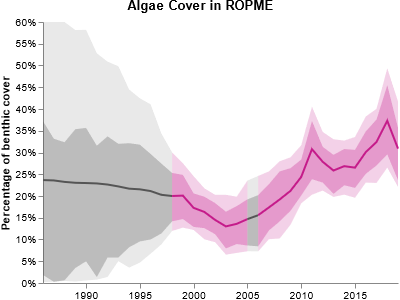

In [5]:
spec=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Algae cover with confidence intervals",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "encode": {
      "enter": {
        "text": {
          "signal": "'Algae Cover in ' +region_name"
        }
      }
    }
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "value": "ROPME"
    },
    {
      "name": "url_param",
      "description": "Signal-based parameterized URL for pulling data based on GCRMN region",
      "update": "'https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27Algae%27 AND gcrmn_reg = '+'%27'+region_name+'%27'"
    }
  ],
  "data": [
    {
      "name": "ac",
      "url": {"signal": "url_param"},
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": [
        {
          "type": "formula",
          "as": "upper_95_ceiling",
          "expr": "datum.upper_95>0.6 ? 0.6 : datum.upper_95"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "ac", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_mod_a",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(!datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=1998"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs_a",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "1998<=year(datum.year)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=2005"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_mod_b",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(!datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "2005<=year(datum.year)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=2006"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_mod_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_mod_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_mod_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs_b",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "2006<=year(datum.year)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95_ceiling"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)

## Type: BAB
Regions where the times series data follow an BAB format (observed, modeled, observed). The difference between specifications were `region_name` and the years of the epochs.  

### [East Asia](https://vega.github.io/editor/#/url/vega/N4KABGBEAkDODGALApgWwIaQFxUQFzwAdYsB6UgN2QHN0A6agSz0QFcAjOxge1IRQyUa6SgFY6AK1jcAdpAA04KABNkCAE6NCeHnJyQAggBtayMPG5V1YAO7NE52QDNGqmfDOMZeZOorojWAUlSDtlFmwwABYABhjFCEgURmp8SIAmUXiQwnRlZS9qSOzE9FY8blhGAC9kSOBIPABPQjr9FzwFKAtvdC8g-Vz8wsgAXwSoHTwjNrBQCETkd25VeqUFqCWfdTWNjcbkAA9OnHm9-arqGQDIyAByY1MwAGFLXzAvMDuwAGp1Gl0AH1rqg6us9qNwRBIRsYWBxiFLtdApEANrgs77EGzSD-JiyYHoUHBc6QVQaLQ6WS3AByRLM3CcYAA4s8AEoAWRpYDxuhJe0g-iMrBxAFF0LA8GADFVMOCERtMQtINjbqx1EZAbl1ET+ftyfBNNo+foAMopZEAWnYEuQyjA2vp2xqdrAAFU2QAZMBObjWQisIxGQpgZToPDoMA22Cu2Qs9lcnkA6kTfasQhhny3O74Igkcg2TSW9Q2OjwdDqCpl7ioUjoQiMSjpPgARyMAH4WwBeU2iz2i54AFTAACowAAxNkAeQ5YG48BkgLDsEQgJi6UB1ENqEXRkQ8HggPQ8DAAHUABKitmisAVBvwLsAUnSAHZHuhkM+X9KaQARMBbuoO6AniYBdl8Px3F+dx-Mmi7YpB0GQPKSgALoTGS4aYDg6KKlCUCqvox56sq6pGPUkBIjc+hkVqFa6gqAq+kB4a7OckwtDiUgpvhiSEOo3CtJWTS3AJNhBKmArajGFFNMgFa3JmyBYFBACadxjPhjH7HgOoyLAzGoGi+GoShEDoYi5YzAMYC4QsSqJIRUCHAgAR1JJiTNK0tw6MSHkqDWfR6HMmERrcxHyFALjIEYyi3HJCnacqenUDiYQRP5kBDAUMhFDgMTypJDkEfS8WuTMXT4WSgVeGi8RgDEdAAGzoWAVUyIwHiRLpIqRVVKU4skqSdGZYAWaUhxqMZeGkn6jBbLc7DcAQNYkYk5U4i5VnuVVRjoOwMXjsKK7deovW7ftMVTlYe2EKdIqFRiVVzQt+gzE4nSZRtZXbWtkzMBV+gAAq+B4vSpXOTIHd4iCdY4Vh-ZAhmsfoj7IbCaEYRg6gANY2XZEDFY0nG3NQAnpojTgCUZpy8VFx7ICccx045pX6DGmhqEe8CVexyqZthUARW1fOJGT3DpuwIn6IBwF4uj7FwrCmUC9N7HFVibNC4e3DsLAR5-RcEvqF17O+PN+sRSzkx6QZfo07Z1uE07ypeTiLhGNsvOi-sRz8T53AAELcNwMzoDIAAUmasKgdCghK6p2gAlArPtJXzGvscT3ntIwnu+N7PuLIc-v6Al6hR+GMd0OXScADxdgAjAAnM3USp6LSvsaZfNd+ZmXY3javnJnnkk0R-yYP5+xU6tpyhYLkDHoCuuW2M0-KksFirLTRdQOmSlsXvkCHBR336FtbldEj82xfF8k7OnouQNLIXn1ATTfZFN8xXFb3cDYXwgJm6iHXi7RITR0hn1+mXL+UVb5-33oQISwDQFPz5jfIMFEhQiluAAYngKIRu7AAAcmB0FZw9kYKcuR4DMFfg0HBsxGrpAoaSCoocdB3V3nvZUVFyL6GAFMGYKl3xmFeFYO4kU7hsjgncLA0dY6y0XHiaRqkH7yN8sgcc9twyVzwNXcu8g1J3CTtIiRvh5HIzwPo6uTDjF0HSI+Ux0iSExEfC8Zwrgt7ICsbomxii6BGAAUAtxI5G5xAcY3JwpjIKAGQCGC1jbGx3TCgsJET4h3DoNE2JUEpFfBAR414MgXBuA8H4liASq6x2CYA9QqDwmRKyTkpO8TEn+OSXQVJQCQGNMydkmJrS8nSI5IzRAKx5GdPjrARO9p2xfFGeHSGc49a+H8FSfS3wcB3A5CsGKdpTGjA7mnF2bDlTjIRjw4+VDsEBFwfoPB7B2BNSagAZleWA3h8Cgw0OPPQ25wpmF0FEH3RW1tQXQg3qPDiOchaT0NsqWeDsGiqyIjrPWBszmQC3nso+z8D7hlmNC-Yp957vxPnAn+d8y4P0+bwl+0Cr6wN+t-aK1KoC1NCTEOlx9IGMsBh-SlbLEGQG6fUtxPKi6YIESFJh+DCHELIZKn20rfl0OaAC+5DU6CvLOTpEOnstB4uPvw24QiAbKQeCYD8njJHSNkfiGQ8jAnKJAjQNRGisBaJ0ZUzpRiTFmK+BY9QFSMBVIMbHexWSnEuK+G4opXiym+KwEkwJnLxUxD6VEwZbSfipuqV05BXKs3NJzcMgpogE0lO8e4ZN+aI1BJCfU3pGTs25ISXmjpgSxUNNbaW3JziRljImVgKZ8kZn-DmQs+SMhlmrzWeGXQsAtkLL2TMZQhzjmd1ORvfYFyC5XKlTc+ecqHlPJee85Vz8qFqv+Seu5QKXwQohOCumFDoXZxxMGGQO0VVIooqi7WK8MXkN3ZsZYO9mbHwJVmQ9KrSVvxgc5IVCD76JTA-sBhlEkMvxQ7-W4cq9V8N0twHGRLBQPvlUQ0hoHwGTANVw41UrTWCOEZasRtrLH2rkQogtrrVFfHURWTRjBQQ+rDX6h+xjHzqUDXcYNoa9GBKjY45xcn42eOrUmxT4bq7psBOkppAz23tN9d2otGaS3GaGYOitVbSk+J050-TLajMtNzfW6uPbXP9Pc+WnZw6N2jsCdM2ZYB5kBaWYyFZHN1lLpXTstdByk5HLo8+5WLskhvB2GSkjZHNU4kec8t5HzRjpfhG+kyj0ZoCjdqTcmd1Mr-rg4ihmTMP1OUoubLmwtrYL3CjzPqKrxaS1fpAfjNAt3Qi0irLCw89gda1kvQ8qAVgGzA5RY2psoAcwttzBFnlbaGXmxnOjn7bgey9kN+lfscv0eDqHGdEcACEIXx2zJTjul2xLXbj2+VdkWN2S53cgC3NuDdy6SYrJ9veRGftj1hZggHZ3btoYroE2uDcwcvimy+n2PcwXnHGgKQe+M6YfrqxPeSB2orUwA3NtFgJVvKExRtnFkGfuiozISpjGCEMNHJZfCqrLUM0vQ2drD5LP4svgfh-+dTUFXowXyslOHpdXxF3LpBKCQFK8oXnGVjDKMPNEKbs3evSQ3toXe2VxvtWN11Rh12DGjUtZVSxqA5rpjseteI7L+SZE8ZdduFR7rBOeu9V2gt-qZOxvk-7lNUeG0qZjep9xmmHO1qc2mptBnM19usx5pPXmLN56s352zdxCkZ5reUxPZmC0udEOXstHbPMpNLz5ttNmA+jJYCOsdCdJ3henVFpk86-CLtkMusA2zdmqHXZutLX3j77ru-D75huKOAvweekrFumIG9vRq+9O-8rAvK9Nk5vcoV9cp3C6nG3mshUA8tpna3aMqvZ0SzLMGf9fJPn5U2jw3ZRflpSIwgSAJ+g11l1AP0wlQgI-igVVyZUFRlypRFR7QQKd0SGPVtzPygDwTN3N0QNVWtxP3wK1UakdzOw4UNW4Sgy+R2wtGok9zY1EV904xDW40dWdT4xDzdWoA9WEy9VE20WL1jhj1k3MQT3bzoBTzU1cXT2KUzzrzkPgPzzc1b1Mwk3MzSU0N8zLUr2rxUNrzrQkMbQVy737SGTbwsO82bwLwr170C0mTeyH1dAi0WVnWiwnzi2nwS3n32Q3RS1x3OEv3hCdyy0uUYOuQNwK132K0vVIKtz+QoKNwIMaifVOVfRv3Jzvz+0gG-V-WvTp3nlf2XmZ1Zz62-15wFD-zqNJH52w1QIpXQOFTRwP0wygOZRgIwII0o1IMlAEny1Py1UgCIOILQRwPo04Vd1iPpQ90gC9xEStSeAUx4N0D4IbQmyEPDxEMjwbwbSkLjwU3r10ILQULjw01MO03OKU0b1z0M0MJM07SOJL30JbwHQDxMMTUc3uN0xqVz2sMLzuDsPeI7x10cK0O+KHX7yC0HwnU8NHx8PH1WUnw2RnznySxCNSy+QiKI2iIPTfjy3I1PUIL32SPK2fVBQJ0hSenYUKJG0ayqmf0ziRja0aJKmJDNk5ktkG0BwwQqIFL62ZKllJgEPlkq3CNmzChwnyJVU62XlXkBHYBp023VG2y6z5P2w210nDjtiAhO3VloMKMuwLmu2PlR30AqAezDkjncKROUBhyLjh1NMR3NJ2EtKlWtKgGxwhwfih3UBdOv1FjpLxz2GJ32FJ2NOdhVXvyXnhSfzKJfwZyAxVLVKxVqLd3qO51gwWPgx6OQ3aNFw-nAJmIZRQIFVwxLK1yKOBOmIl2QMQ1aPV2F1gMwM70bIALwIyPGIIWoyVRSKP3IKw3JJYVILoMYxzIwSWJWJ93WP902NkG2Orl2OEJDVELEwsJOLkzOLkKuLT3szMOz0eIV2eO7yLwhMLU+KcKMJ+MrRrzuPUIbK+NsJ0IeIbQcLfMQhcPhLcILVC2Hy8JnTnXRP8M2Vn1XQX2SzxN4QJKiLXy5JnniLGMK0pNKwrNSPVTHLt0ahBRyNDJlIVOfgTIrEfz6zZP60ZwzIP2xQg3-ylQaJnIFGaMFxAJFXLi6OVElzVw4tuA0O4ogWbIFz4trNAKwO5WHKwTQqo0VU-3pWwptz7KBRoIAKnPmI33WhYJlWWPYLWJtQ2K+AdS2N4x2MlLDzuCE03MOIuOOKkwDRkMkQBM6UPKUOPOfIsI0J-LBI-MBJvOLTvNhLsyfP+JfKsOhJePfLeLso+J6UisvP8z73GQRMdLCxArHxiwXUxMCJxKX3xJXylSQpYpQpksoPQqSMwrOyUvSO3yoLoGyNh1yMVlv3jMKOKPVKouFOA31kzLZwYuQqQUPhKuVDYpwyF3cg7M6NIN4tbP4v0EIwrOGNIzJLtwmIVRoyEtmPoMGouB0rNX0o4yMsD14LMrXIsr2KsojzEPE0-MMQctjz3NkIsLcrjWUL+Kzxcpz3PIMMSvBNishMCphJ72kV+K0zCq8tfKCuirkO-Oht-LhJSoAobSAuRMi1RKyoxPiygsSxgtxLCIjLTkQuyzPlJISLPUqrGGpOlMjNGlMlGCAA)
This region is the only member of this group.

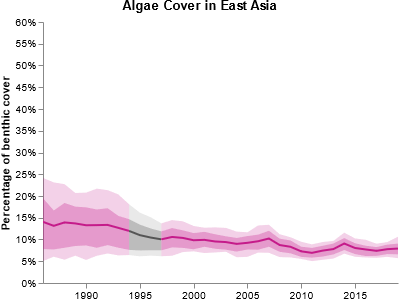

In [6]:
spec=json.loads("""
{
  "$schema": "https://vega.github.io/schema/vega/v5.json",
  "description": "Algae cover with confidence intervals",
  "width": 400,
  "height": 250,
  "padding": 0,
  "autosize": {"type": "fit", "contains": "padding"},
  "title": {
    "encode": {
      "enter": {
        "text": {
          "signal": "'Algae Cover in ' +region_name"
        }
      }
    }
  },
  "signals": [
    {
      "name": "region_name",
      "description": "Name of GCRMN region",
      "value": "East Asia"
    },
    {
      "name": "url_param",
      "description": "Signal-based parameterized URL for pulling data based on GCRMN region",
      "update": "'https://wri-rw.carto.com/api/v2/sql?q=SELECT * FROM ocn_dash_02_gcrmn_lhcc_ac WHERE topic=%27Algae%27 AND gcrmn_reg = '+'%27'+region_name+'%27'"
    }
  ],
  "data": [
    {
      "name": "ac",
      "url": {"signal": "url_param"},
      "format": {
        "type": "json",
        "property": "rows",
        "parse": {"year": "date:'%Y'"}
      },
      "transform": [
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "time",
      "domain": {"data": "ac", "field": "year"},
      "range": "width",
      "padding": 0
    },
    {
      "name": "yscale", 
      "domain": [0, 0.6], 
      "nice": true, 
      "range": "height"
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "scale": "xscale",
      "labelFlush": true,
      "labelOverlap": true
    },
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Percentage of benthic cover",
      "format": "%"
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs_a",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=1994"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_mod_a",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(!datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "1994<=year(datum.year)"
            },
            {
              "type": "filter", 
              "expr": "year(datum.year)<=1997"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.13},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#555555"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_mod_a"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#555555"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    },
    {
      "type": "group",
      "from": {
        "facet": {
          "name": "series_ac", 
          "data": "ac", 
          "groupby": "gcrmn_reg"
        }
      },
      "data": [
        {
          "name": "ac_obs_b",
          "source": "series_ac",
          "transform": [
            {
              "type": "filter", 
              "expr": "toBoolean(datum.measured)"
            },
            {
              "type": "filter", 
              "expr": "1997<=year(datum.year)"
            }
          ]
        }
      ],
      "marks": [
        {
          "type": "area",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_95"},
              "y2": {"scale": "yscale", "field": "upper_95"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.2},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.5}
            }
          }
        },
        {
          "type": "area",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "lower_80"},
              "y2": {"scale": "yscale", "field": "upper_80"},
              "fill": {"value": "#c51b8a"},
              "fillOpacity": {"value": 0.3},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {
              "fill": {"value": "#bb6633"},
              "fillOpacity": {"value": 0.7}
            }
          }
        },
        {
          "type": "line",
          "from": {"data": "ac_obs_b"},
          "encode": {
            "update": {
              "x": {"scale": "xscale", "field": "year"},
              "y": {"scale": "yscale", "field": "value"},
              "stroke": {"value": "#c51b8a"},
              "tooltip": {
                "signal": "{title:'Algae Cover', 'Region':datum.gcrmn_reg, 'Year':timeFormat(datum.year,'%Y'), 'Cover':format(datum.value,'.2%'), '80% Confidence':format(datum.lower_80*100,'.1f')+'–'+format(datum.upper_80*100,'.1f')+'%', '95% Confidence':format(datum.lower_95*100,'.1f')+'–'+format(datum.upper_95*100,'.1f')+'%', 'Method':(datum.measured ? 'Mean of observations' : 'Modeled')}"
              }
            },
            "hover": {"stroke": {"value": "#bb6633"}}
          }
        }
      ]
    }
  ]
}
""")
vega_view=dict(spec)
vega_view['width']=widget_width
vega_view['height']=widget_height
Vega(vega_view)